<a href="https://colab.research.google.com/github/thiagoteles10/vendas_games/blob/main/projeto_vendas_jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1 - Entendimento do problema

O projeto visa esclarecer para os vendedores do universo Game, quais os jogos e plataformas mais arrecadam ao redor do mundo, oferecendo assim um resumo detalhado sobre em qual Game e plataforma investir.

O conjunto de dados analisados contém uma lista de jogos com vendas maiores que 1.000.000 de cópias


**O projeto visa esclarecer para as lojas responsáveis pela vendas de Games os seguintes tópicos:**

1- Qual jogo tem o maior preço de venda

2- Qual plataforma vende mais jogo

3- Quantos jogos foram lançados por ano

4- Qual Gênero de jogo foi mais lançado por ano

5- Qual gênero de jogo foi mais vendido por ano

6- Qual gênero de jogo tem o valor mais alto(globalmente)

7- Dentro dos três principais anos quais foram os gêneros de jogos mais vendidos.

8- Quais as principais vendas globais por editor(publisher)

9- Vendas na América do Norte em milhões

10- Venda em milhões na Europa

11- Venda em milhões no Japão

12- Venda em milhões no resto do mundo

13- Total de vendas ao redor do mundo

14- jogo mais vendido do mundo

15- Receita total por país



## Etapa 2 - coleta de dados

Onde eu vou conseguir os dados para responder essas perguntas? quais são as formas?

https://www.kaggle.com/datasets/gregorut/videogamesales

## Etapa 3 - Análise exploratória dos dados

Agora nós vamos analisar os dados, entender tudo que é importante para responder nossa pergunta.

In [ ]:
# carregando as bibliotecas usadas na análise exploratória

import pandas as pd
import numpy as np

# visualização de dados

import missingno
import seaborn as sns
import matplotlib.pyplot as plt

# calculos estatísticos

from scipy import stats




## Dicionário de dados

About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales

In [ ]:
# carregando o dataset
df = pd.read_csv("vendas_games.csv")

In [ ]:
# verificando as primeiras linhas
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# verificando informações arespeito do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# fazendo unpack de linhas e colunas
rows, columns = df.shape

In [ ]:
# fazendo um levantamento estatístico
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [ ]:
#fazendo o levantamento estatístico com todas as colunas sendo mostradas
df.describe(include='all')

## Dados faltantes

In [ ]:
# fazendo a soma de valores nulos por coluna
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<Axes: >

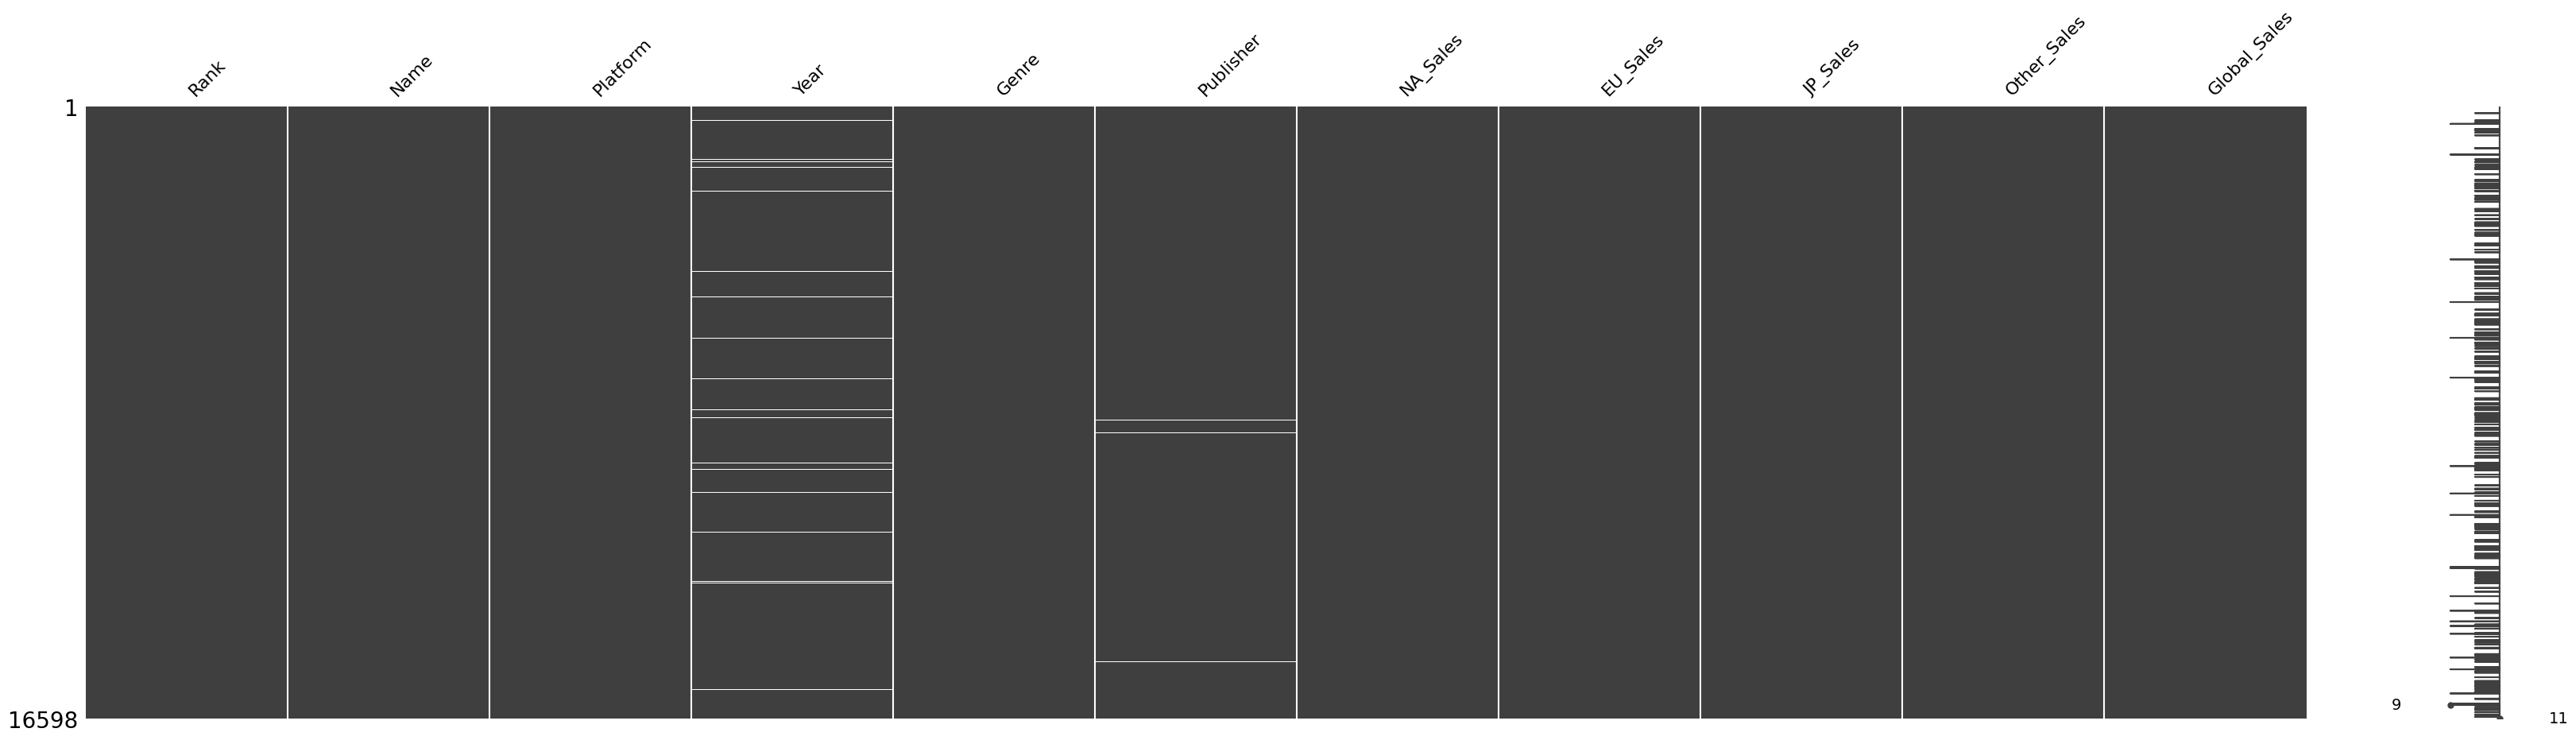

In [ ]:
# visualizando as colunas com dados faltantes
missingno.matrix(df,figsize=(40,10))

In [ ]:
percentual_nan = (df.isnull().sum()/rows) * 100

In [ ]:
# percentual de dados faltantes
percentual_nan

In [ ]:
df[df.isnull().any(axis=1)].head()

## Duplicatas

In [ ]:
# verificando se há linhas duplicadas
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


## Features

## Name - The games name

In [ ]:
df['Name'].nunique()

11493

In [ ]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

## Qual jogo tem o maior preço de venda?

In [ ]:
top_sales_game = df.head(15)

In [ ]:
top_sales_game

In [ ]:
top_sales_game = top_sales_game[['Name','Year','Genre','Global_Sales']]

In [ ]:
top_sales_game = top_sales_game.sort_values(by=['Global_Sales'], ascending=False)

In [ ]:
top_sales_game

In [ ]:
name_game = top_sales_game['Name']
year_game = top_sales_game['Year']
y = np.arange(0, 15)

## Visualizando os jogos mais vendidos do mundo e o ano de lançamento

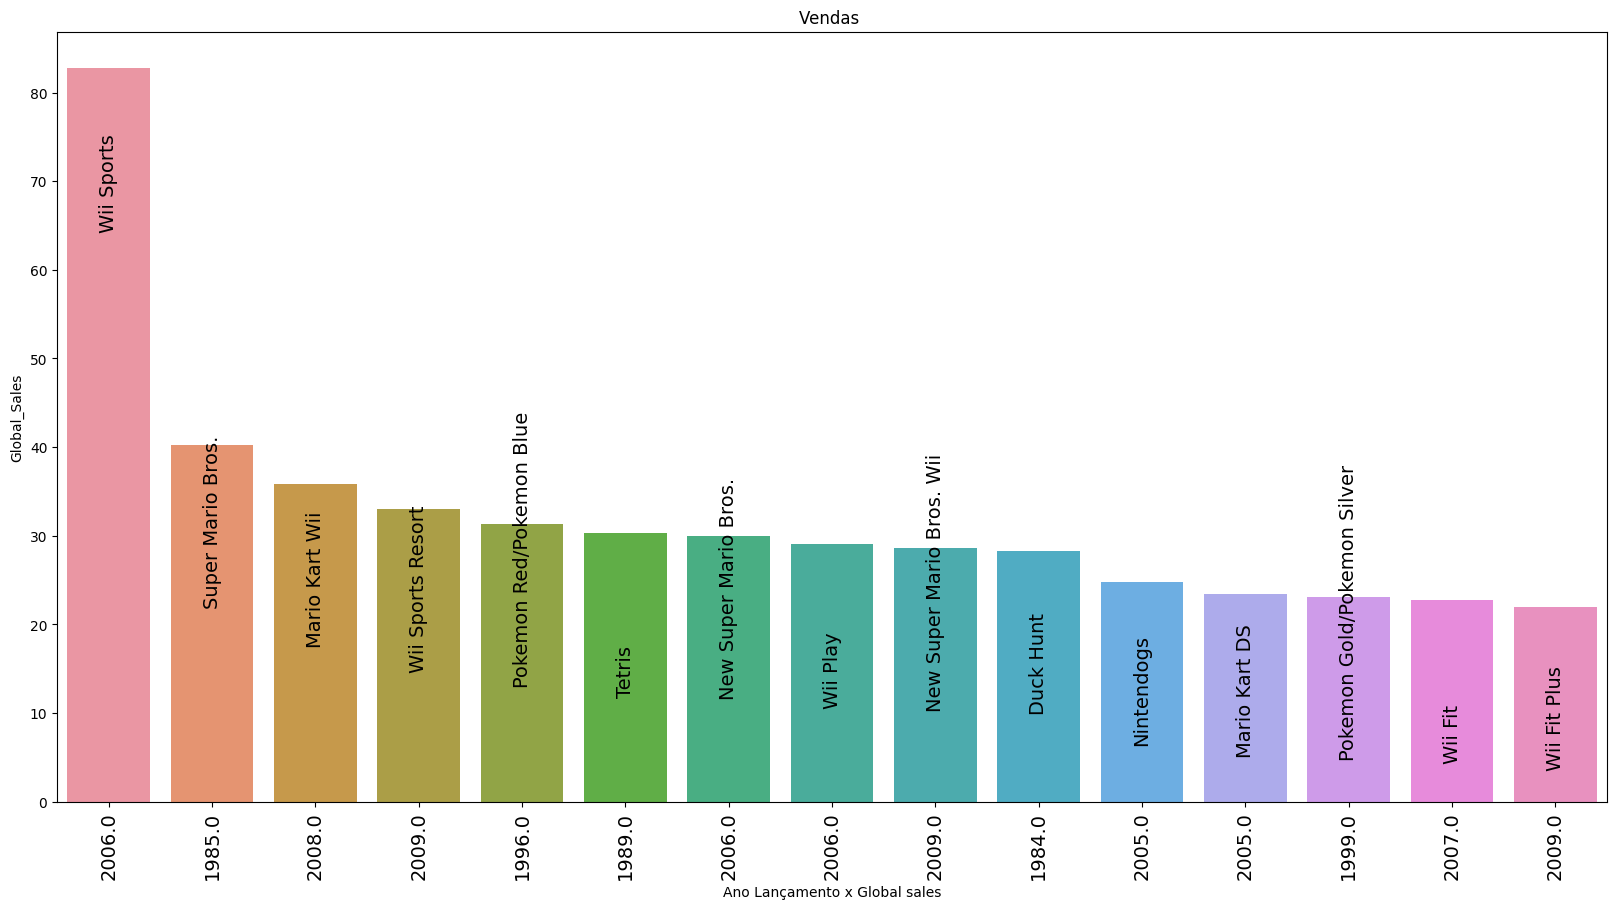

In [ ]:
plt.figure(figsize=(20,10))
genre_graf_bar = sns.barplot(x='Name', y='Global_Sales', data= top_sales_game)
index = 0
for i in top_sales_game['Global_Sales'].values:
  genre_graf_bar.text(index, i - 18, name_game[index], color='#000', size= 14, rotation= 90, ha='center')
  index += 1
plt.xticks(y, top_sales_game['Year'],fontsize=14, rotation=90)
plt.xlabel('Ano Lançamento x Global sales')
plt.title('jogo mais vendido x ano de Lançamento ')
plt.show()

## Platform - Platform of the games release (i.e. PC,PS4, etc.)

In [ ]:
df['Platform'].nunique()

31

In [ ]:
df['Platform'].value_counts()

In [ ]:
df['Platform'].unique()

## Qual a plataforma que vende mais jogo?

In [ ]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
df_platform = df.groupby(['Platform'])['Global_Sales'].sum()

In [ ]:
df_platform

In [ ]:
df_platform = df_platform.reset_index()

In [ ]:
df_platform = df_platform.sort_values(by=['Global_Sales'], ascending=False)

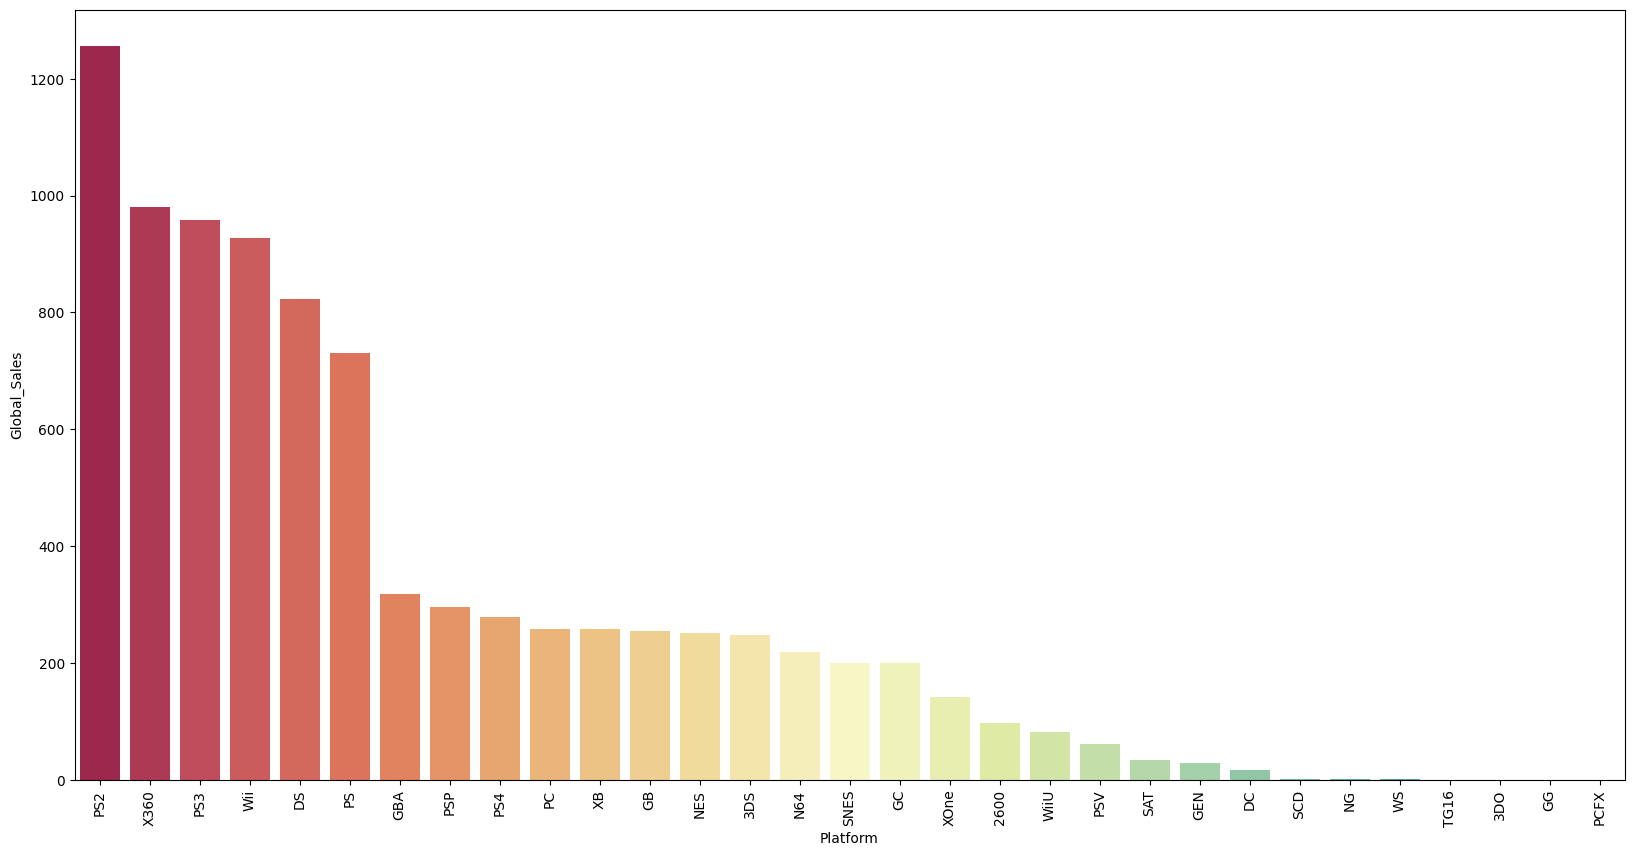

In [ ]:
plt.figure(figsize=(20,10));
sns.barplot(x='Platform', y='Global_Sales', data= df_platform, palette='Spectral');
plt.title('Plataforma x Vendas Globais')
plt.xticks(rotation=90);

## Year - Year of the game's release

In [ ]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [ ]:
df.fillna(-1, inplace=True)

In [ ]:
df['Year'] = df['Year'].astype('int64')

In [ ]:
df['Year'].dtypes

dtype('int64')

## Jogos lançados por ano

In [ ]:
df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False)

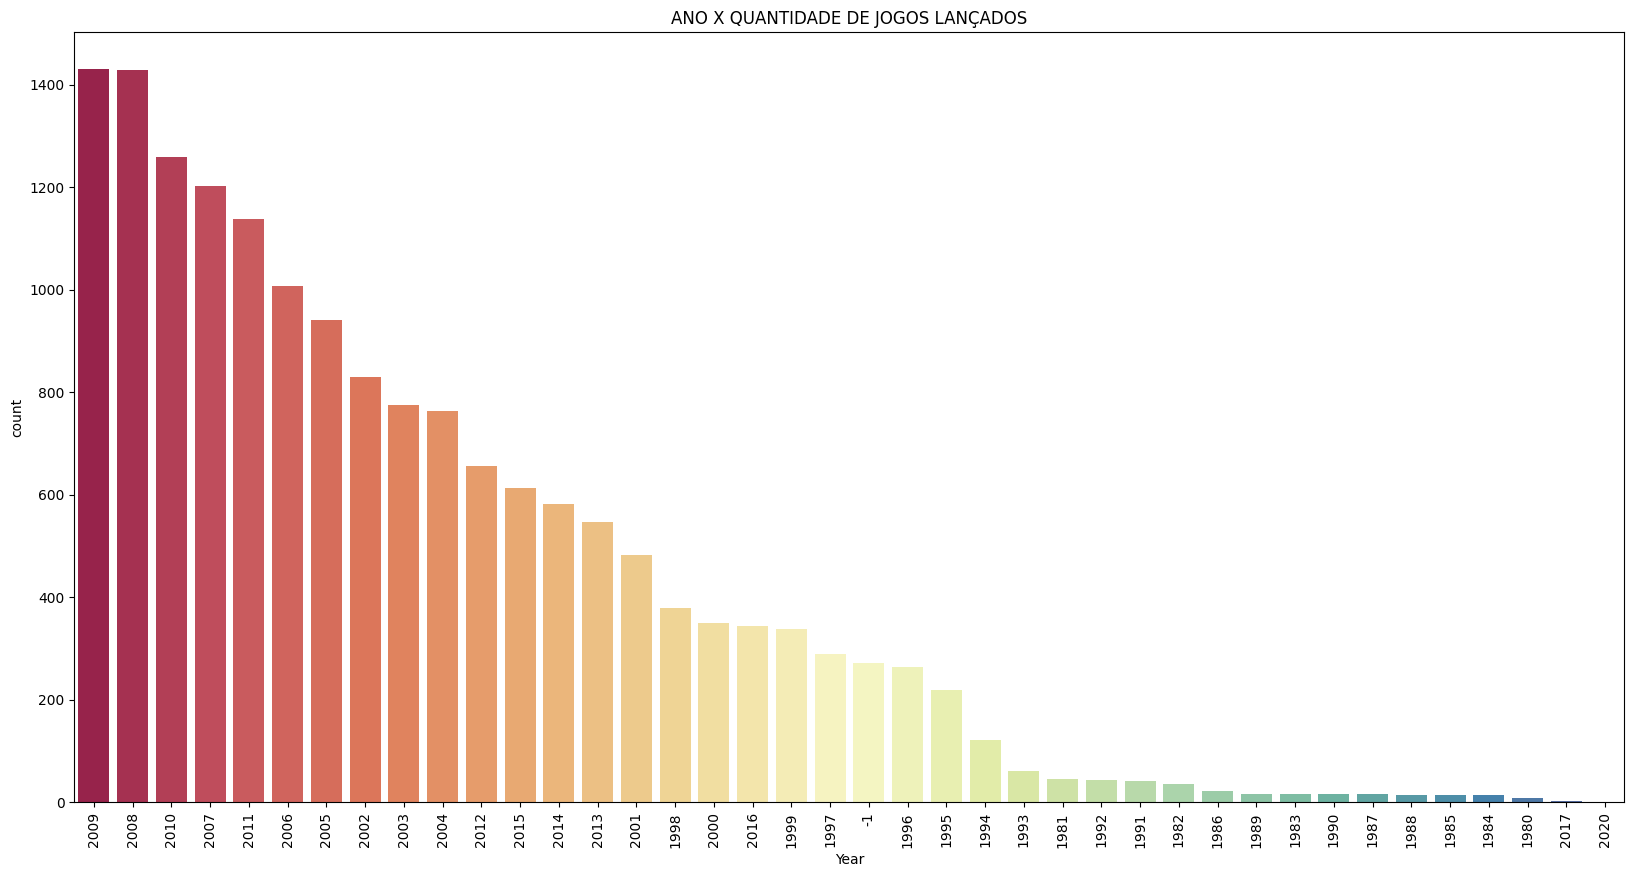

In [ ]:
plt.figure(figsize=(20,10));
sns.countplot(data=df, x='Year', order=df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, palette='Spectral');
plt.xticks(rotation=90);
plt.title('ANO X QUANTIDADE DE JOGOS LANÇADOS');

Vemos no gráfico acima uma crescente no lançamento de jogos entre os 1994 até o ano de 2014

## Genre - Gênero de jogo mais lançado





In [ ]:
df['Genre'].nunique()

In [ ]:
df['Genre'].unique()

In [ ]:
df['Genre'].value_counts(ascending=False)

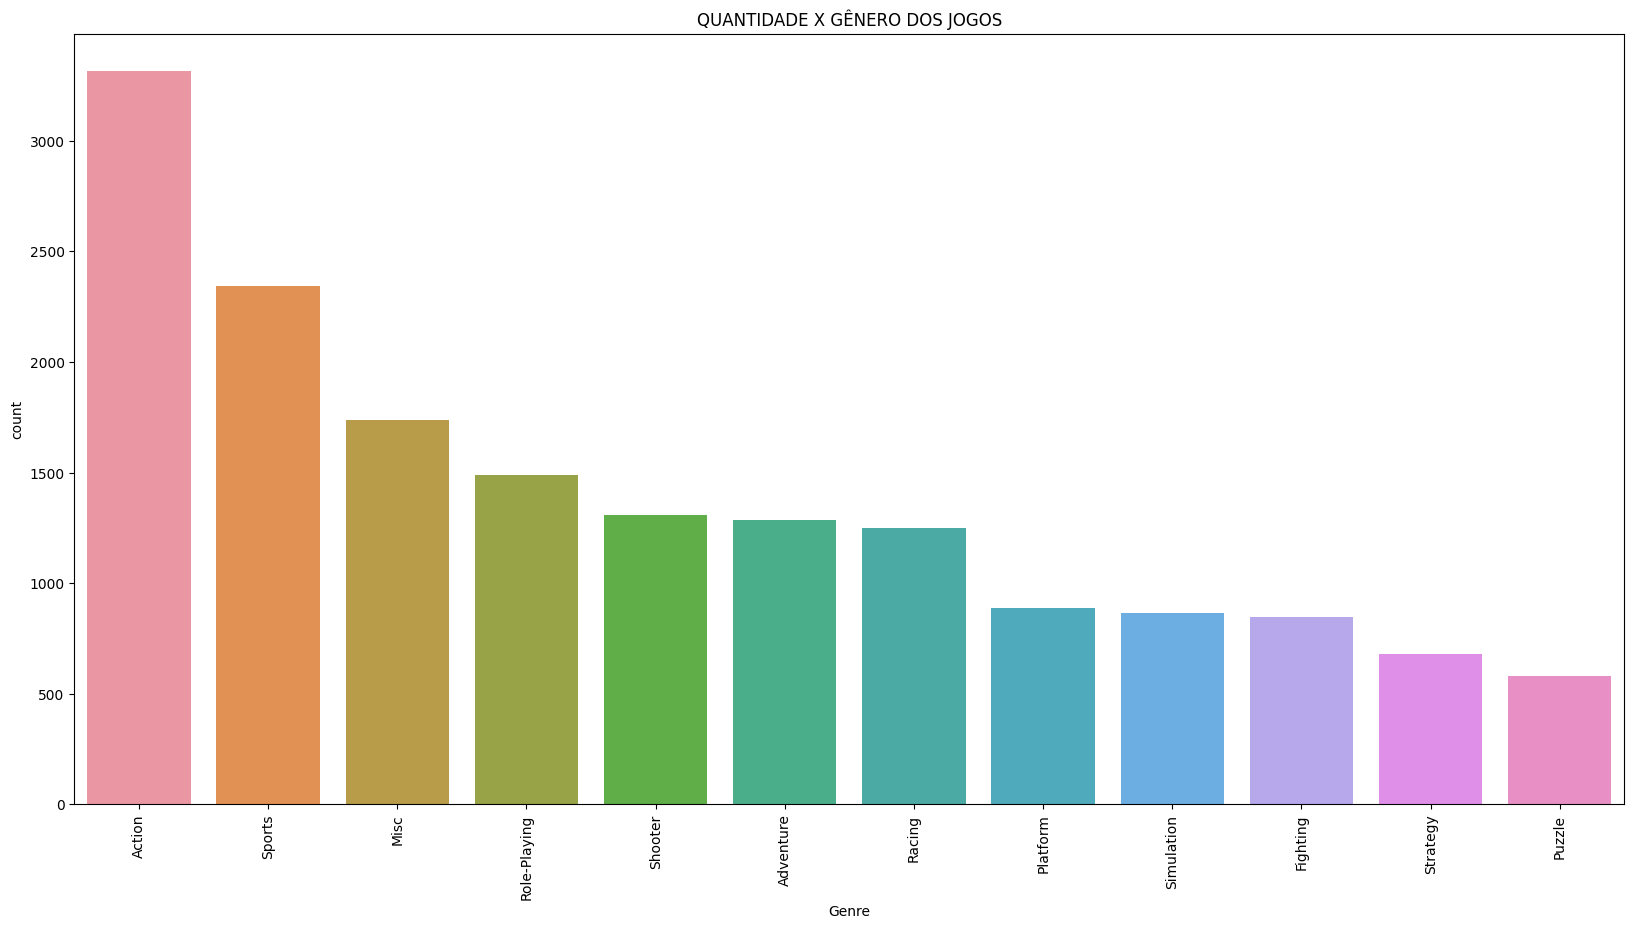

In [ ]:
plt.figure(figsize=(20,10));
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index);
plt.xticks(rotation=90);
plt.title('QUANTIDADE X GÊNERO DOS JOGOS');

## Qual o gênero de jogo foi mais lançado por ano

In [ ]:
from os import name
max_year_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')

In [ ]:
max_year_idx = max_year_df.groupby(['Year'])['count'].transform(max)== max_year_df['count']

In [ ]:
max_year_idx.head()

In [ ]:
max_year_genre = max_year_df[max_year_idx].reset_index(drop=True)

In [ ]:
max_year_genre

In [ ]:
max_year_genre = max_year_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)

## Filtrando para pegar somente os gêneros dos jogos mais vendidos por ano

In [ ]:
max_year_genre.head(10)

In [ ]:
genre = max_year_genre['Genre'].values

In [ ]:
genre

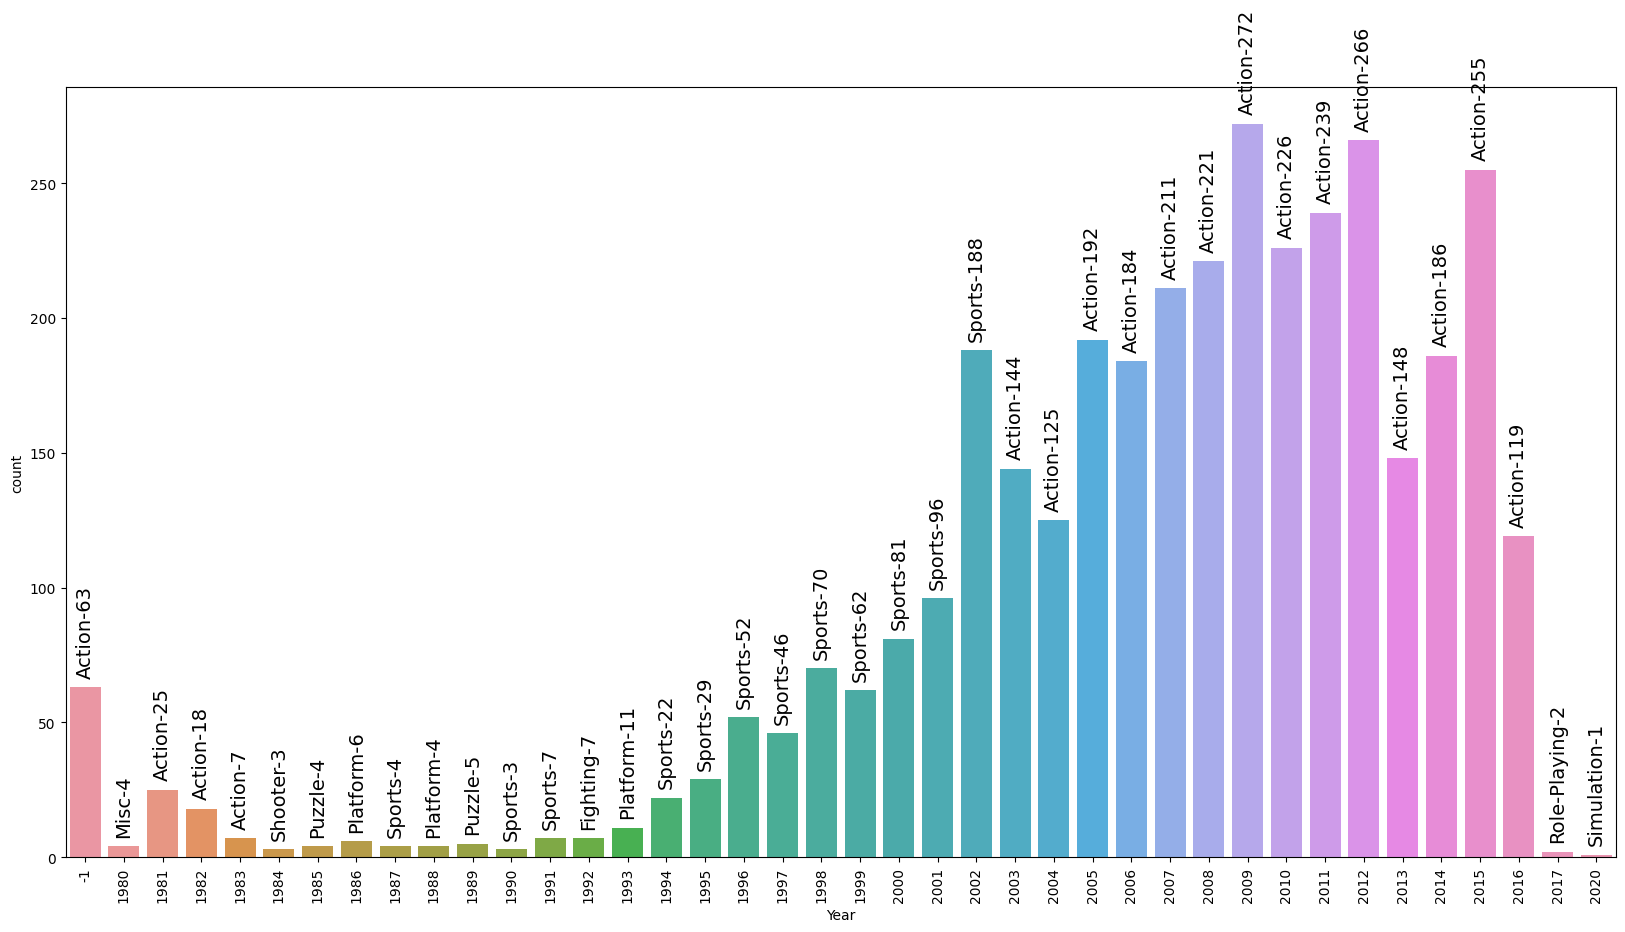

In [ ]:
plt.figure(figsize=(20,10))
genre_graf_bar = sns.barplot(x='Year', y='count', data= max_year_genre)
index = 0
for i in max_year_genre['count'].values:
  genre_graf_bar.text(index, i + 5 , str(genre[index] + '-' + str(i)),color='#000', size= 14, rotation= 90, ha='center')
  index += 1
plt.xticks(rotation=90)
plt.show()

Vemos no gráfico acima que os jogos de ação dominam as vendas anuais

## Qual o gênero de jogo teve mais vendas globais

In [ ]:
sales_year_idx = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

In [ ]:
sales_year_idx

In [ ]:
sales_year = sales_year_idx.groupby(['Year'])['Global_Sales'].transform(max)== sales_year_idx['Global_Sales']

In [ ]:
sales_year

In [ ]:
sales_year_max = sales_year_idx[sales_year].reset_index(drop=True)

In [ ]:
sales_year_max.head()

In [ ]:
genre = sales_year_max['Genre']

## Qual Gênero de jogo teve mais venda globais por ano

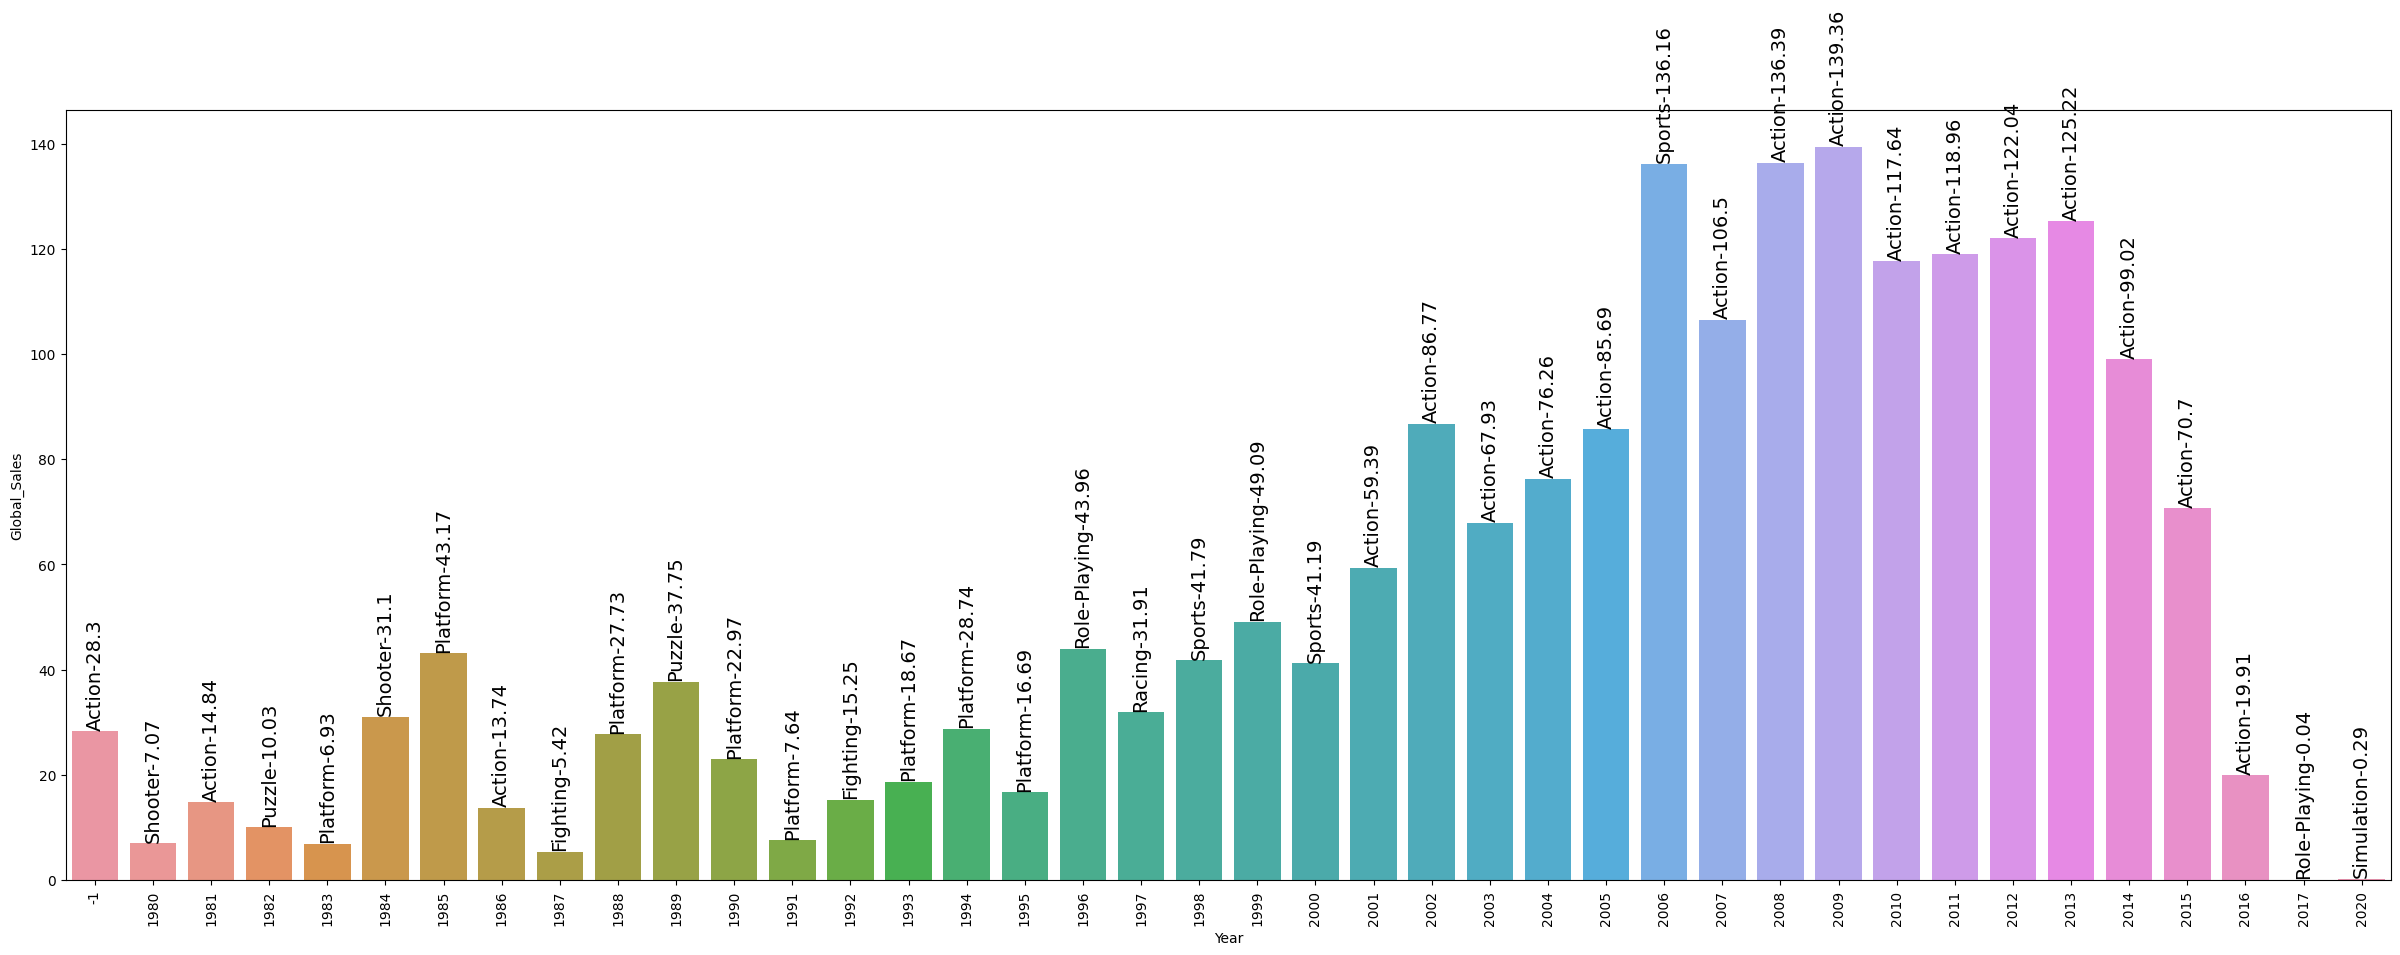

In [ ]:
plt.figure(figsize=(30,10))
genre_graf_bar = sns.barplot(x='Year', y='Global_Sales', data= sales_year_max)
index = 0
for i in sales_year_max['Global_Sales'].values:
  genre_graf_bar.text(index, i + 1 , str(genre[index] + '-' + str(round(i,2))),color='#000', size= 14, rotation= 90, ha='center')
  index += 1
plt.xticks(rotation=90)
plt.show()

## Qual gênero de jogo tem o valor de vendas mais alto(globalmente)

In [ ]:
df_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()

In [ ]:
df_genre

In [ ]:
df_genre = df_genre.reset_index()

In [ ]:
df_genre

In [ ]:
df_genre = df_genre.sort_values(by='Global_Sales', ascending=False)

In [ ]:
df_genre.head()

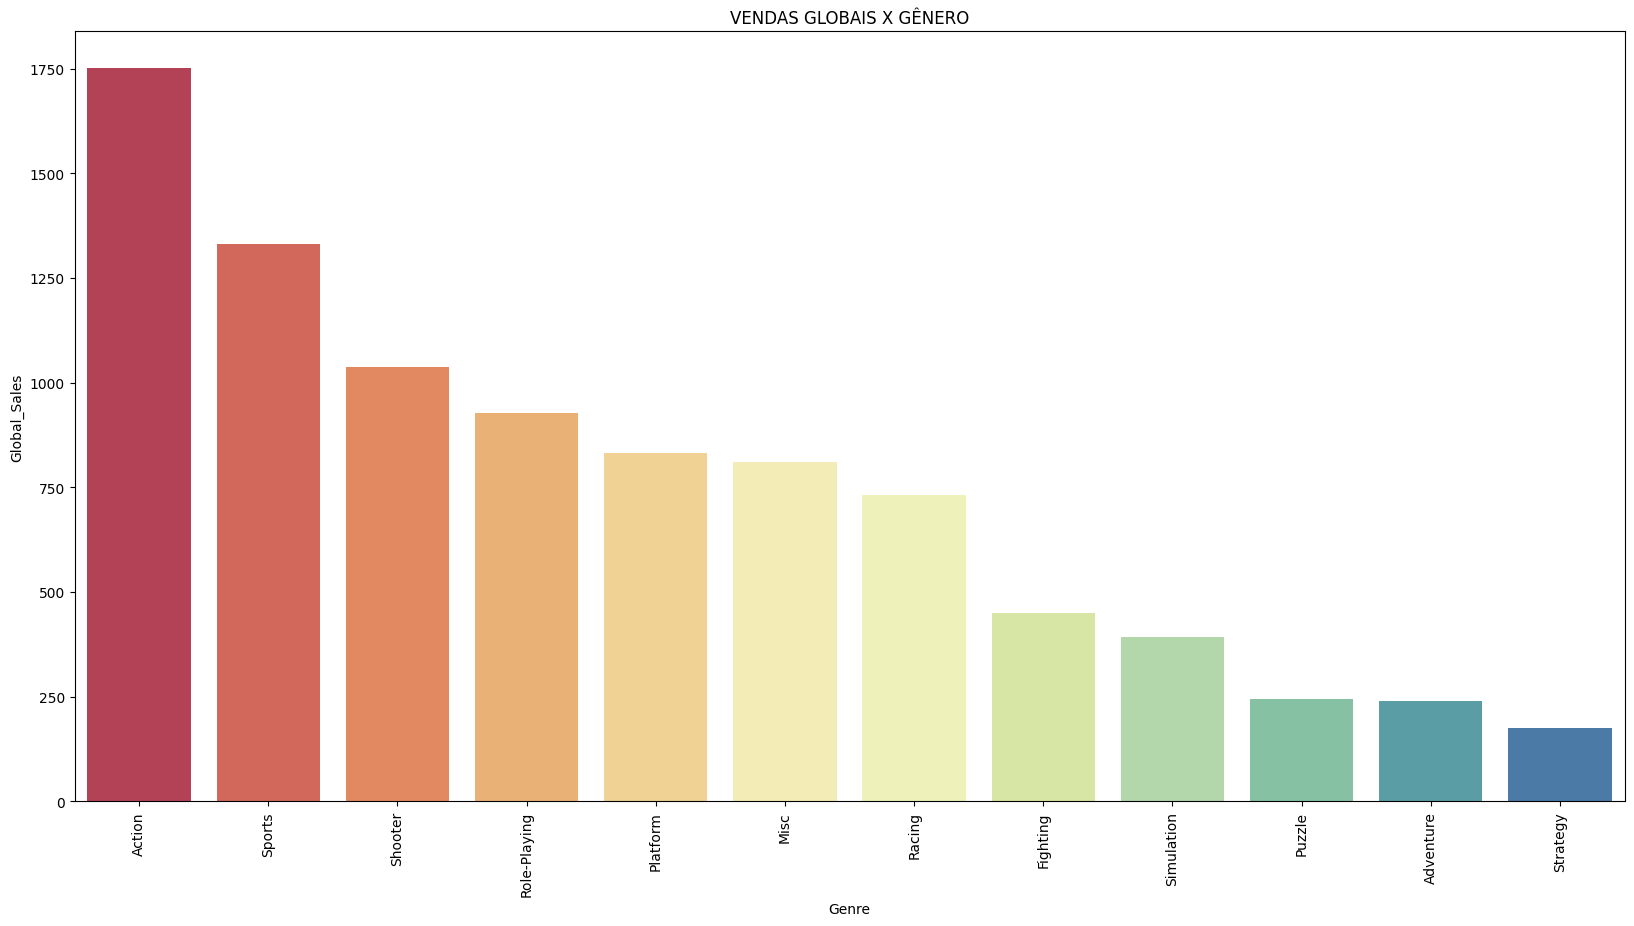

In [ ]:
plt.figure(figsize=(20,10));
sns.barplot(x='Genre', y='Global_Sales', data= df_genre, palette='Spectral');
plt.xticks(rotation=90);
plt.title('VENDAS GLOBAIS X GÊNERO');

## Dentro dos três principais anos quais foram os gêneros de jogos mais vendidos.


In [ ]:
df['Year'].value_counts().iloc[:3].index

Int64Index([2009, 2008, 2010], dtype='int64')

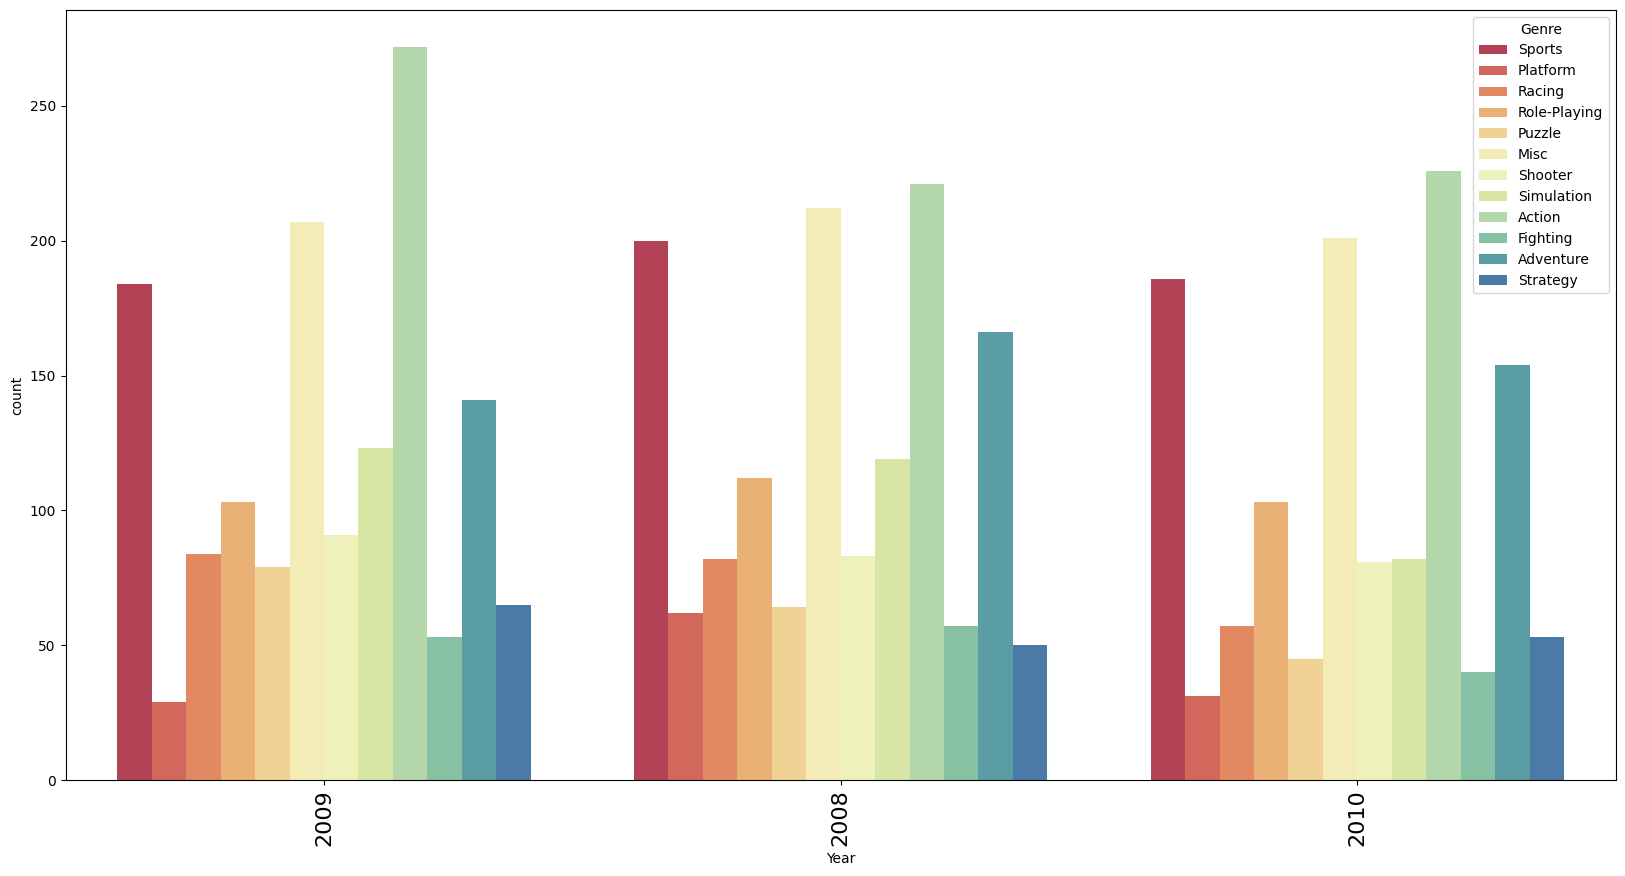

In [ ]:
plt.figure(figsize=(20,10));
sns.countplot(data=df, x='Year', hue='Genre', order=df['Year'].value_counts().iloc[:3].index, palette='Spectral');
plt.xticks(size=16, rotation=90);

## Publisher - Publisher of the game

In [ ]:
df['Publisher'].nunique()

579

In [ ]:
df['Publisher'].unique()

## Quais as principais vendas globais por editor(publisher)

In [ ]:
sales_publisher = df[['Publisher','Global_Sales']]

In [ ]:
sales_publisher

In [ ]:
sales_publisher = sales_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)

In [ ]:
sales_publisher

In [ ]:
sales_publisher = sales_publisher.reset_index()

In [ ]:
sales_publisher

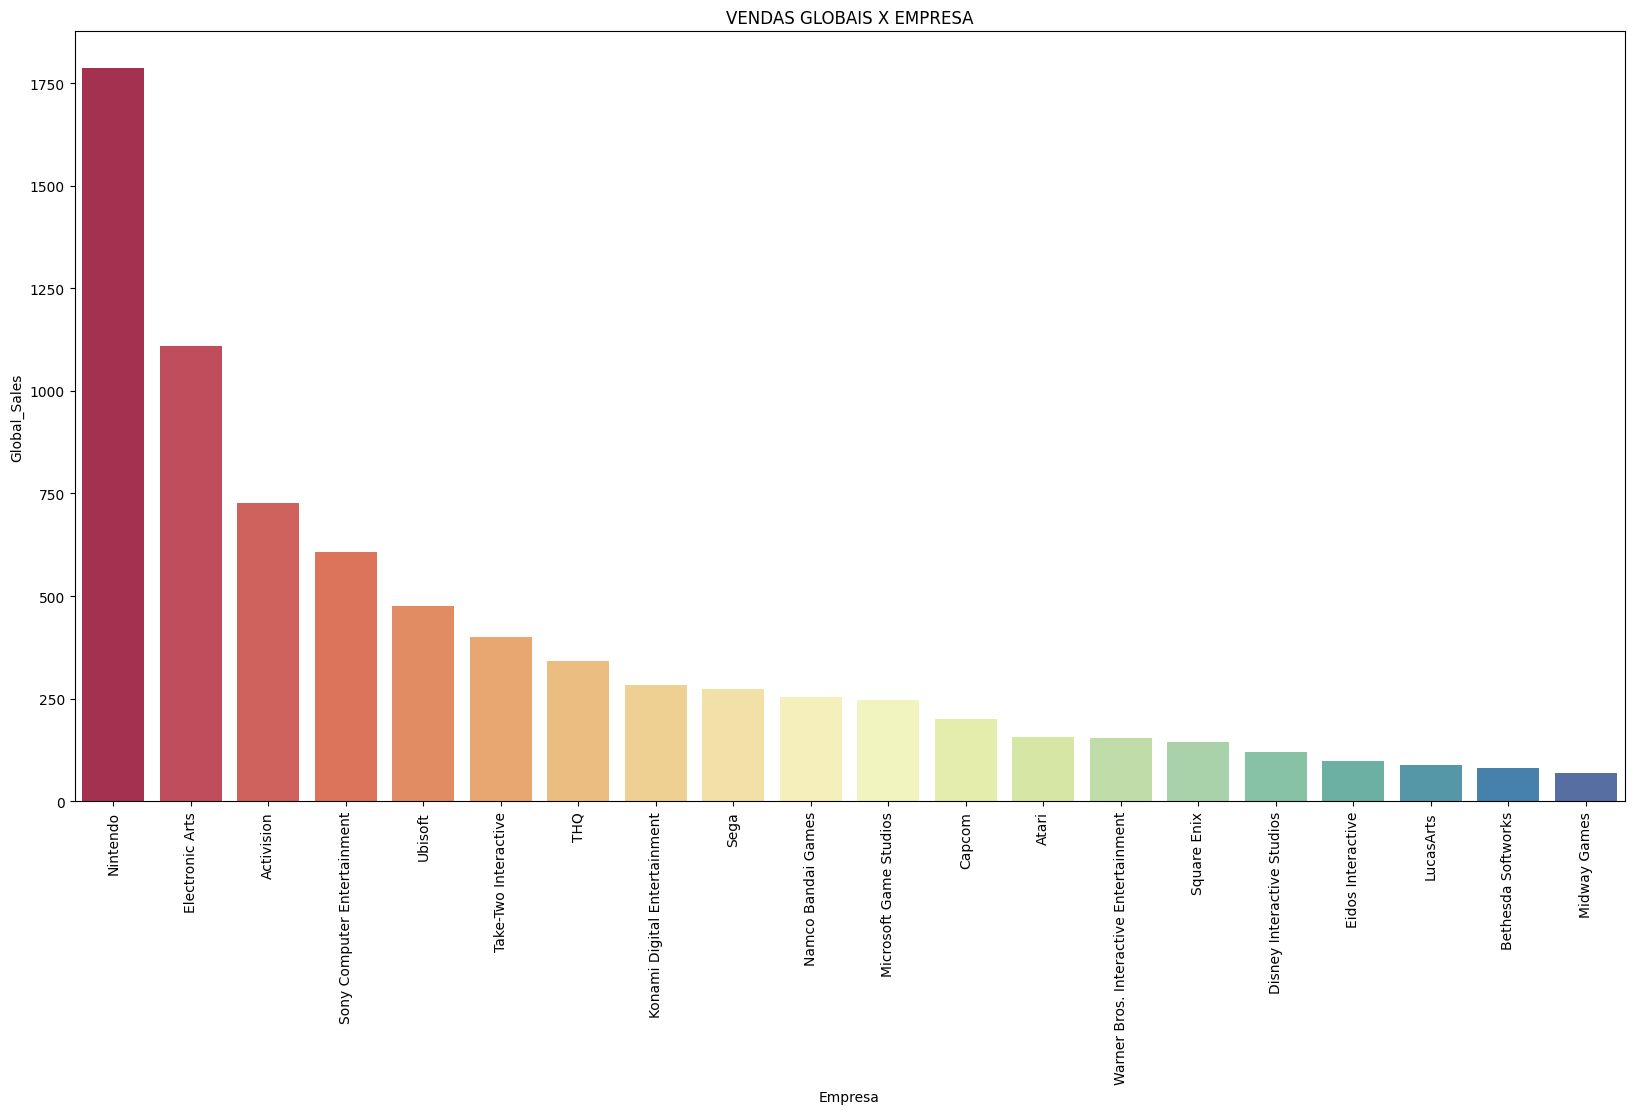

In [ ]:
plt.figure(figsize=(20,10));
sns.barplot(x='Publisher', y='Global_Sales', data=sales_publisher, palette='Spectral');
plt.xticks(rotation=90);
plt.title('VENDAS GLOBAIS X EMPRESA');
plt.xlabel('Empresa');

## NA_Sales - Sales in North America (in millions)

In [ ]:
df['NA_Sales'].describe()

In [ ]:
df['NA_Sales'].sort_values(ascending=False)

In [ ]:
df[df['NA_Sales']== 0]

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('NA_Sales')
plt.show()

Vemos acima a presença significativa de muitos outliers o que distorce o valor da média.

## Vendas na ámerica do norte por ano

In [ ]:
df_nasales_year = df.groupby(by=['Year'])['NA_Sales'].sum()

In [ ]:
df_nasales_year.head()

In [ ]:
df_nasales_year = df_nasales_year.reset_index() #

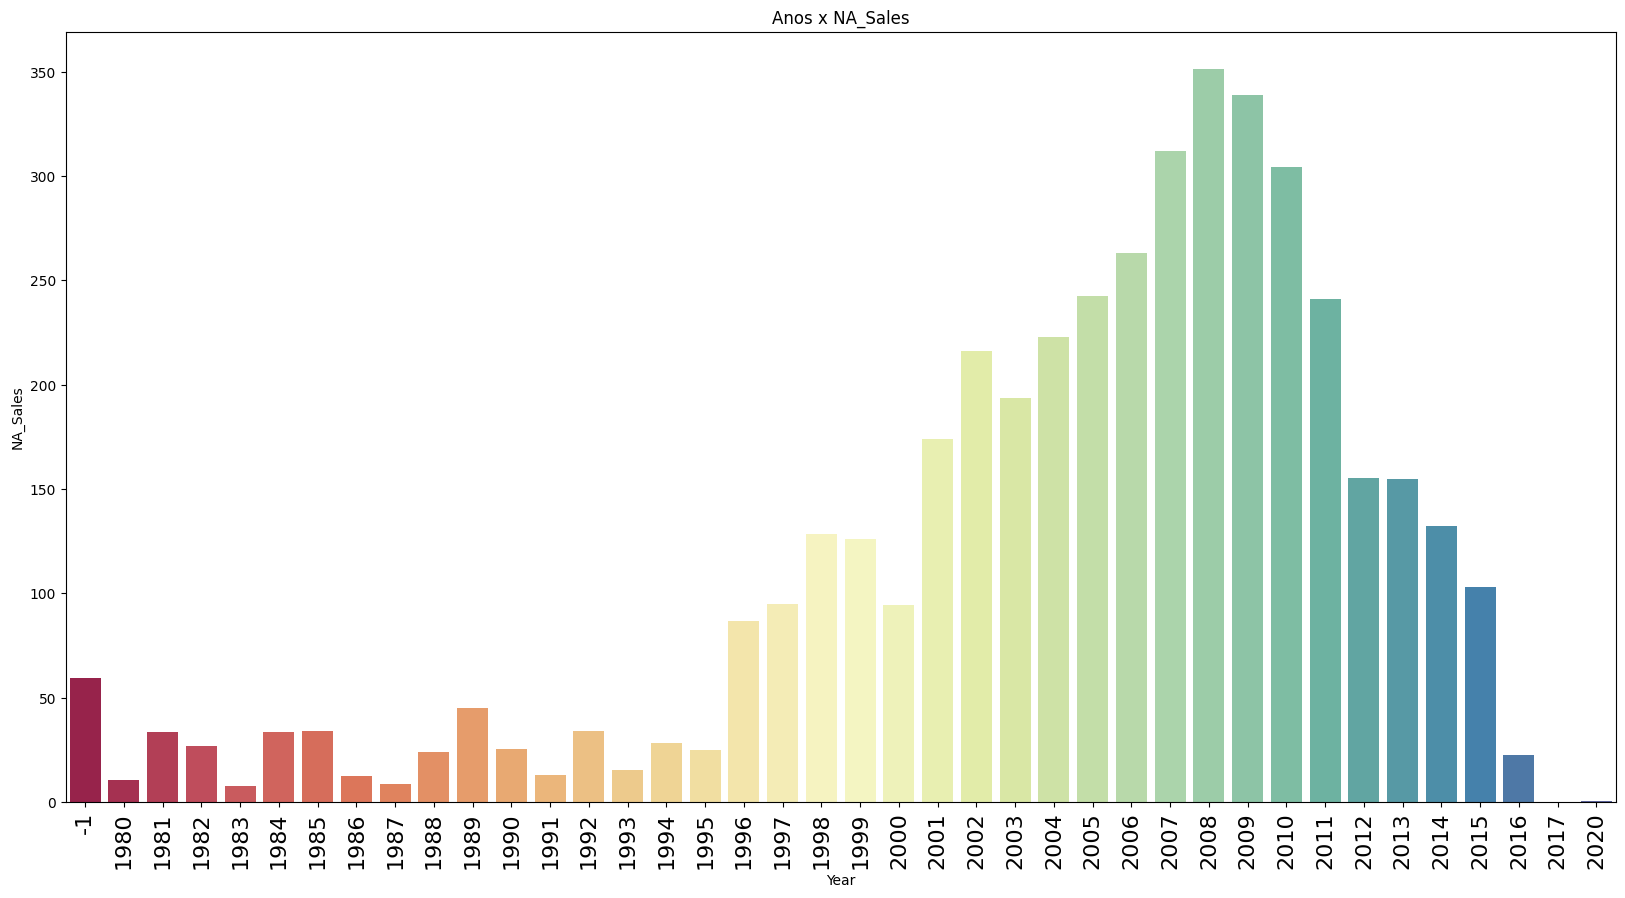

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='NA_Sales', data=df_nasales_year,palette='Spectral' )
plt.title('Anos x NA_Sales')
plt.xticks(size=16, rotation=90);

vemos no gráfico acima que a partir do ano de 1996 na Ámerica do Norte tivemos um enorme aumento no número de vendas e os números de vendas so vieram ficar abaixo das vendas de 1996 no ano de 2016.

## EU_Sales - Sales in Europe (in millions)

In [ ]:
df['EU_Sales'].describe()

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [ ]:
df['EU_Sales'].sort_values(ascending=False)

0        29.02
2        12.88
3        11.01
10       11.00
16        9.27
         ...  
12566     0.00
12565     0.00
12564     0.00
12563     0.00
16597     0.00
Name: EU_Sales, Length: 16598, dtype: float64

consultando o nome do jogo que mais vendeu

In [ ]:
df[df['EU_Sales']== 29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('EU_Sales')
plt.show()

In [ ]:
df_eusales_year = df.groupby(by=['Year'])['EU_Sales'].sum()

In [ ]:
df_eusales_year

In [ ]:
df_eusales_year = df_eusales_year.reset_index()

In [ ]:
df_eusales_year.head()

## Visualizando as vendas de jogos na Europa por ano.

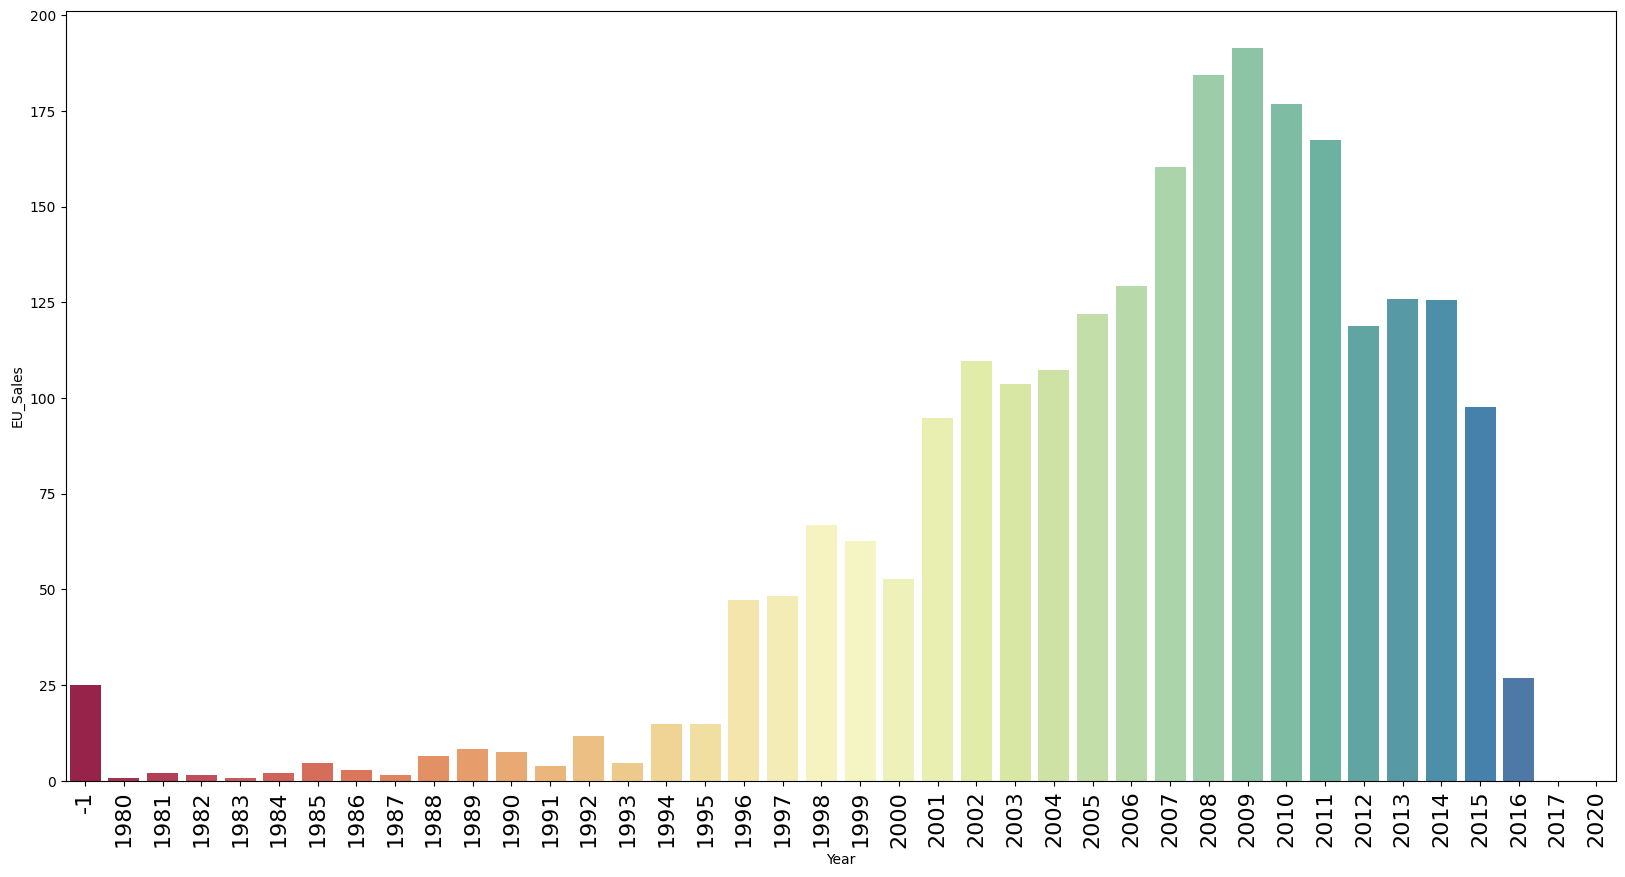

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='EU_Sales', data=df_eusales_year,palette='Spectral' )
plt.xticks(size=16, rotation=90);

Como no gráfico da Ámerica do Norte, as vendas na europa tiveram um aumento expressivo no ano de 1996 e em seguida uma queda a patamares abaixo das vendas de 1996 no ano de 2016 seguindo a tendência da Ámerica do Norte.

## JP_Sales - Sales in Japan (in millions)

In [ ]:
df['JP_Sales'].describe()

In [ ]:
df['JP_Sales'].sort_values(ascending=False)

### Qual o jogo mais vendido no japão.

In [ ]:
df[df['JP_Sales']== 10.22]

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('JP_Sales')
plt.show()

## Vendas de jogos no japão por ano

In [ ]:
df_jpsales_year = df.groupby(by=['Year'])['JP_Sales'].sum()

In [ ]:
df_jpsales_year = df_jpsales_year.reset_index()

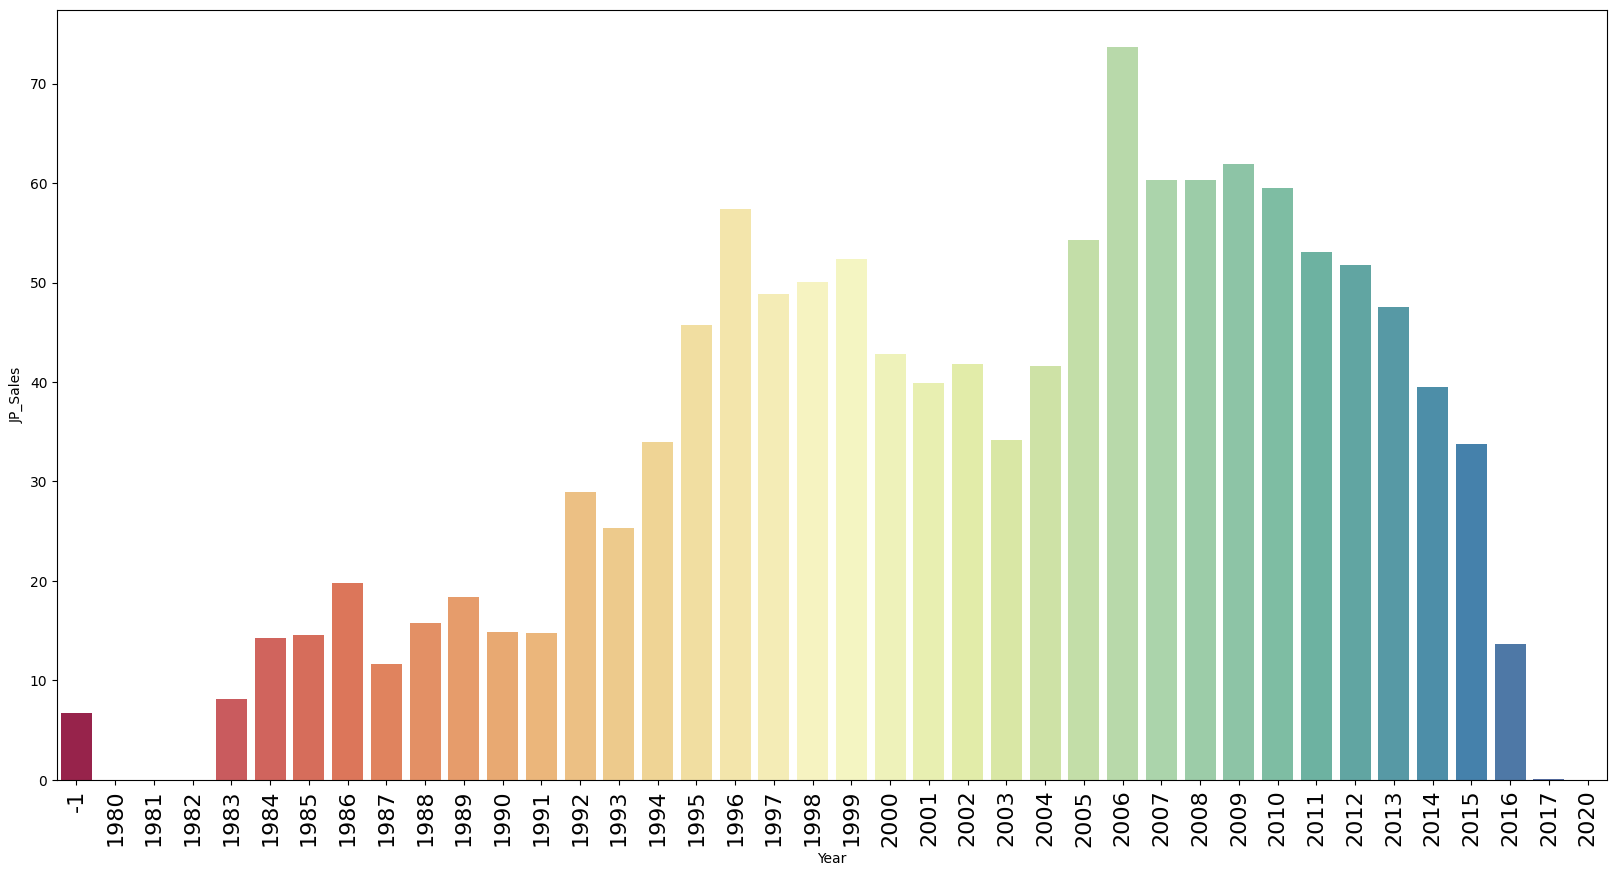

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='JP_Sales', data=df_jpsales_year,palette='Spectral' )
plt.xticks(size=16, rotation=90);

No gráfico acima vemos que no Japão que no ano de 1996 tivemos um aumento significativo nas vendas, porém, os valores oscilam ficando abaixo das vendas de 1996 nos anos seguintes. Os únicos anos que os valores ficaram acima das vendas de 1996 foram os anos de 2006 - 2010. Portanto aqui o padrão difere das vendas na Ámerica do Norte e Europa.

## Other_Sales - Sales in the rest of the world (in millions)

In [ ]:
df['Other_Sales'].describe()

In [ ]:
df['Other_Sales'].sort_values(ascending=False)

In [ ]:
df[df['Other_Sales']== 10.57]

In [ ]:
max_other_sales = df['Other_Sales'].max()

In [ ]:
df[df['Other_Sales']== max_other_sales]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('Other_Sales')
plt.show()

## Vendas no resto do mundo

In [ ]:
df_othersales_year = df.groupby(by=['Year'])['Other_Sales'].sum()

In [ ]:
df_othersales_year = df_othersales_year.reset_index()

<Figure size 2000x1000 with 0 Axes>

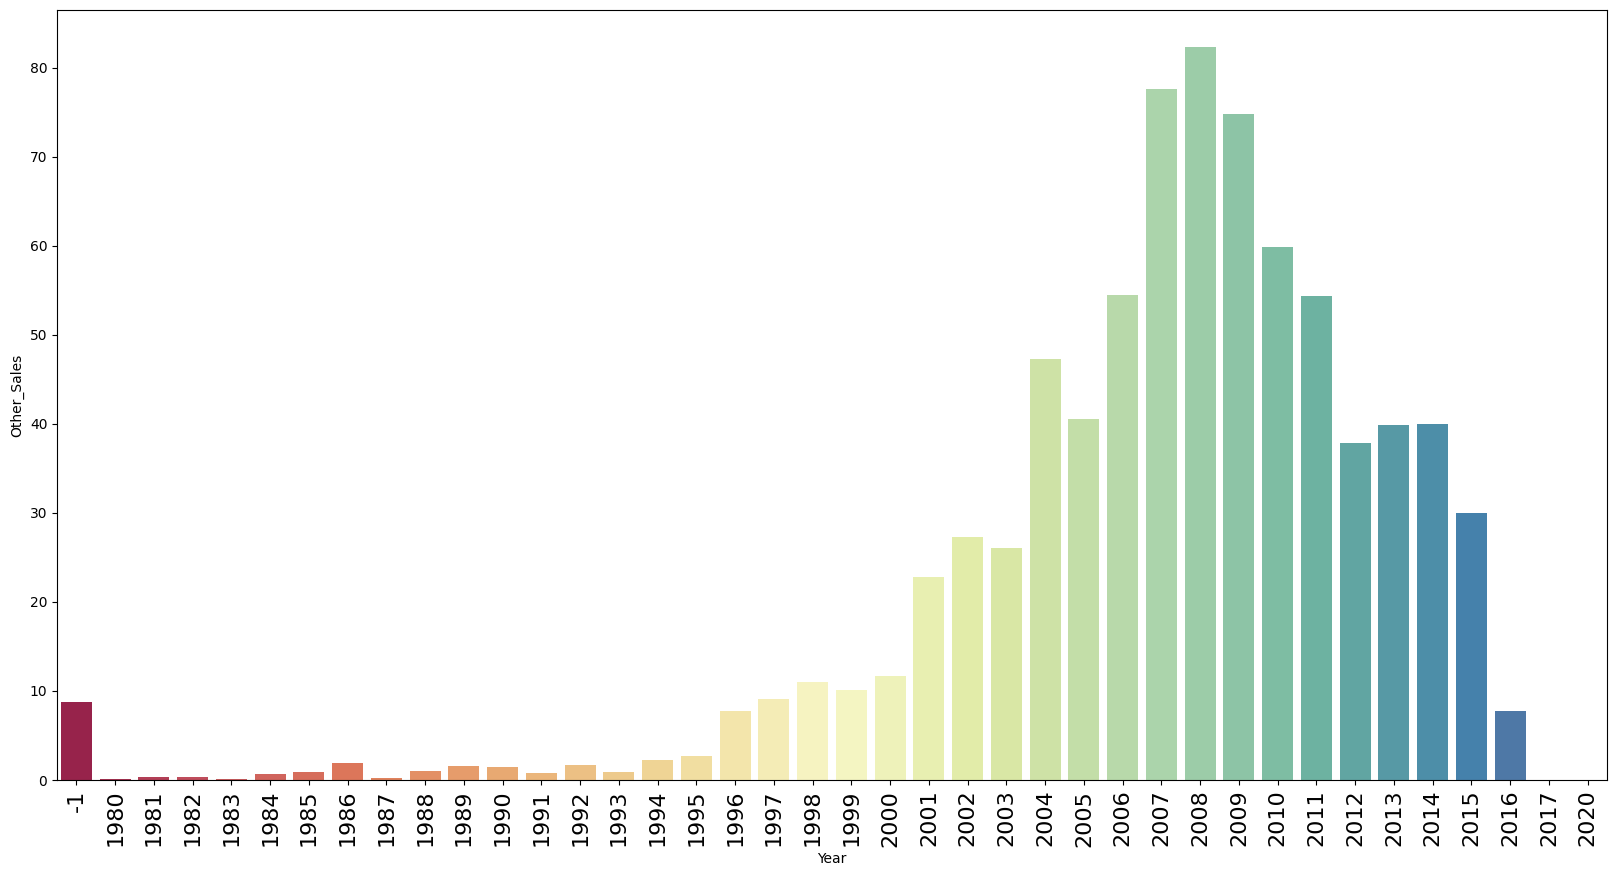

In [ ]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Other_Sales', data=df_othersales_year, palette='Spectral' )
plt.xticks(size=16, rotation=90);

O gráfico acima segue um padrão bastante parecido com os gráficos da Ámerica do Norte e Europa.



##Global_Sales - Total Vendas mundial

In [ ]:
df['Global_Sales'].describe()

In [ ]:
df['Global_Sales'].sort_values(ascending=False)

## Jogo mais vendido do mundo

In [ ]:
df[df['Global_Sales']== 82.74]

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('Global_Sales')
plt.show()

## Vendas globais por ano

In [ ]:
df_globalsales_year = df.groupby(by=['Year'])['Global_Sales'].sum()

In [ ]:
df_globalsales_year = df_globalsales_year.reset_index()

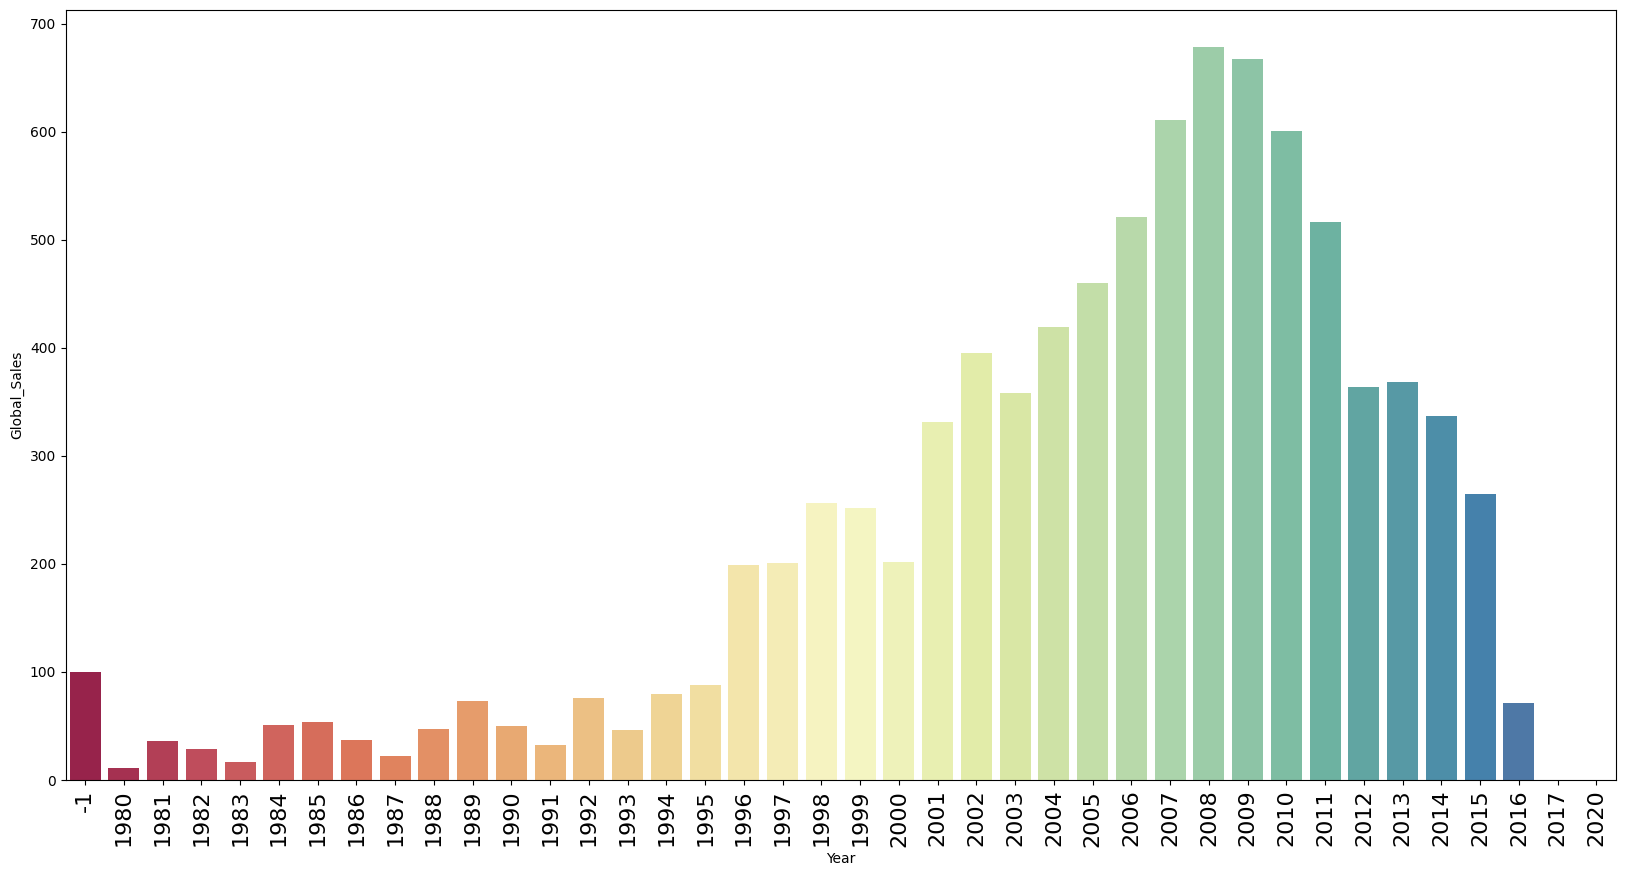

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Global_Sales', data=df_globalsales_year, palette='Spectral' )
plt.xticks(size=16, rotation=90);

No gráfico acima vemos um padrão bem parecido com o da Ámerica do Norte e Europa.

## Receita total da Ámerica do Norte, Europa, Japão e outros países.

In [ ]:
top_sales_country = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [ ]:
top_sales_country.head()

In [ ]:
top_sales_country = top_sales_country.sum().reset_index()

In [ ]:
top_sales_country

In [ ]:
top_sales_country = top_sales_country.rename(columns={'index': 'country', 0: 'sum of sales'})

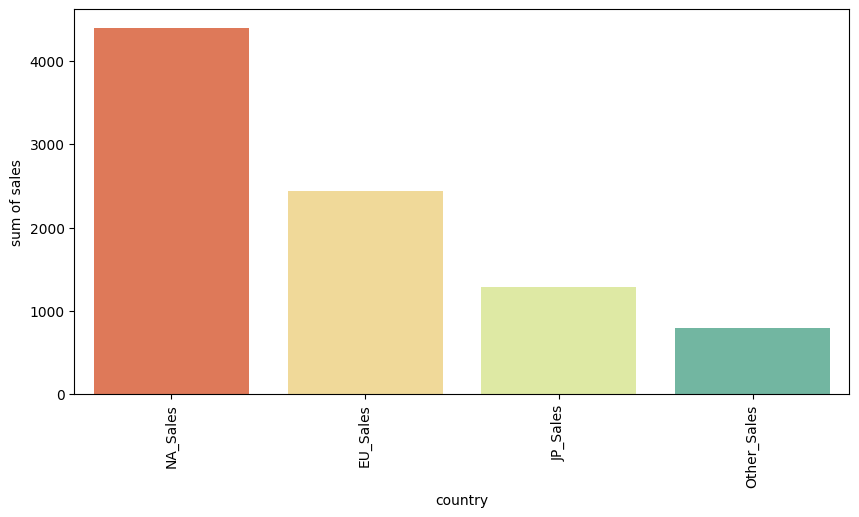

In [ ]:
plt.figure(figsize=(10,5));
sns.barplot(x='country', y='sum of sales', data=top_sales_country, palette='Spectral');
plt.xticks(rotation=90);

In [ ]:
label = top_sales_country['country']

In [ ]:
label

In [ ]:
sum_of_sales = top_sales_country['sum of sales']

In [ ]:
sum_of_sales

## Visualizando a dominância da Ámerica do norte e Europa nas vendas globais.

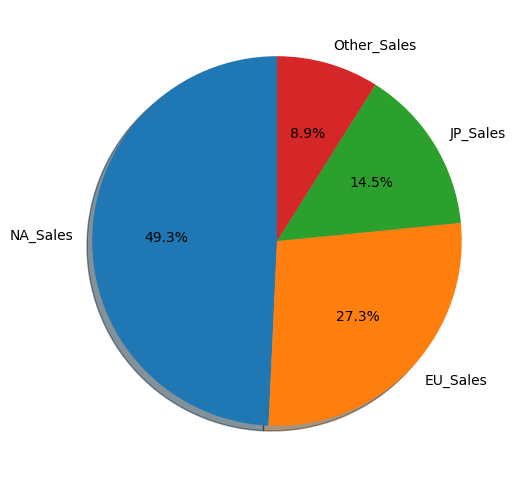

In [ ]:
plt.figure(figsize=(14,6));
plt.pie(sum_of_sales, labels=label, autopct='%1.1f%%', shadow=True, startangle=90);

# Distribuição das vendas de NA_Sales, EU_Sales, JP_Sales e Other_Sales

In [ ]:
df_hist_transform_log = df.copy()

In [ ]:
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.NA_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.EU_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.JP_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Other_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Global_Sales != 0]


<ipython-input-182-e61996fc7b9a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_hist_transform_log[j]), bins=20, kde=False, fit=stats.gamma);


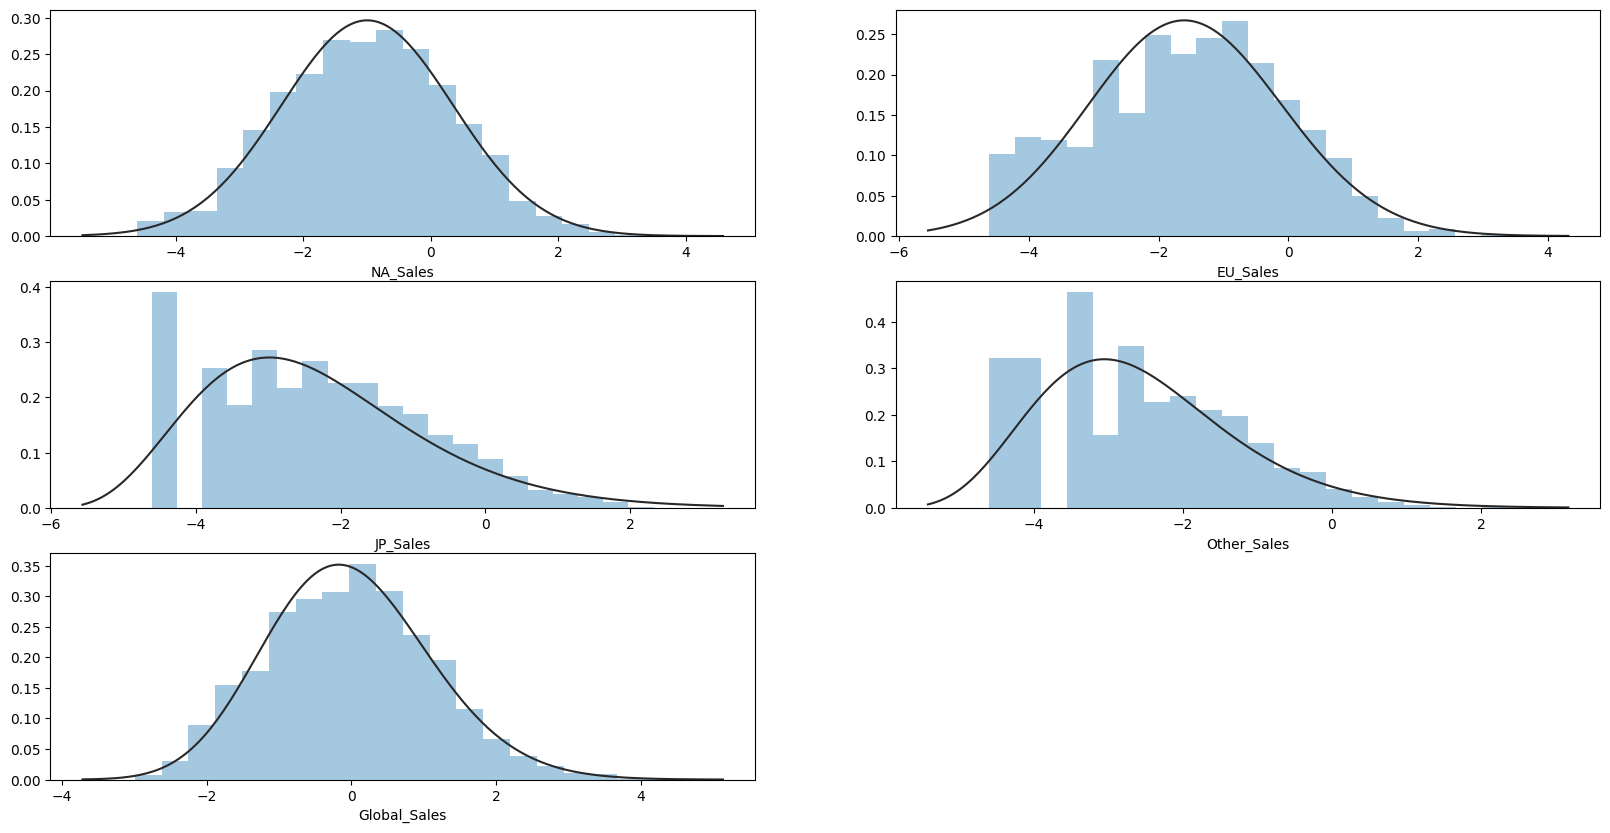

In [ ]:
plt.figure(figsize=(20,10))
columns_country = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, j in enumerate(columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(np.log(df_hist_transform_log[j]), bins=20, kde=False, fit=stats.gamma);

## Correlação entre feautures

<ipython-input-183-0fe486fefd96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidth=3 )


<Axes: >

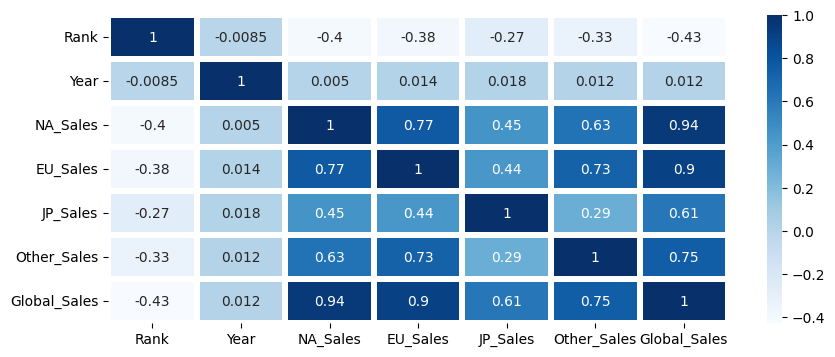

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidth=3 )

# MODELOS DE MACHINE LEARNING

## TÉCNICAS DE SELEÇÃO DE VARIÁVEIS

## SelectFromModel do scikit-learn para selecionar as variáveis mais importantes com base nos coeficientes obtidos pelo modelo de regressão linear.

In [ ]:
# instalando a biblioteca category encoders
!pip install category_encoders

In [2]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

# Carregar o conjunto de dados
df = pd.read_csv('vendas_games.csv')

# dropando valores nulos, como os nulos representam menos de 2% do dataset achei melhor dropar.
df = df.dropna()

# separando as variáveis
X = df.drop(['Global_Sales','Rank'], axis=1)
y = df['Global_Sales']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tag_encoder = TargetEncoder()


X_train_transformed = tag_encoder.fit_transform(X_train,y_train)
X_test_transformed = tag_encoder.transform(X_test)

# Treinar um modelo de regressão linear
model = LinearRegression()
#model.fit(X_train_transformed, y_train)

# Selecionar variáveis importantes usando a importância dos coeficientes
sfm = SelectFromModel(model, threshold=0.1)
sfm.fit(X_train_transformed, y_train)

# Obter as colunas selecionadas
selected_columns = X_train_transformed.columns[sfm.get_support()]

print("Variáveis mais importantes:")
print(selected_columns)


Variáveis mais importantes:
Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


Vemos acima quais as variáveis foram consideradas mais importantes pela técnica de select from model com o uso de linear regression. Temos que ter cuidado se formos alterar o threshold do select from model, pois podemos deixar de fora algumas variáveis. É uma técnica bastante interessante pois podemos selecionar as variável de acordo com o threshold. O select from model no mostra a importância das variáveis da mais importante para menos importante, porém não nos diz em valores qual a influência de cada variável para o modelo.

# Permutation importance

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders import TargetEncoder

# Carregar os dados
df = pd.read_csv('vendas_games.csv')

# deletando linhhas com valores nulos
df = df.dropna()


# Separar as variável dependente da variável independente.
X = df.drop(['Global_Sales','Rank','Name'], axis=1)
y = df['Global_Sales']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o codificador CatBoost
encoder = CatBoostEncoder()
#encoder = TargetEncoder()

# Codificar as variáveis categóricas
categorical_cols = ['Platform', 'Genre', 'Publisher']
X_train_encoded = encoder.fit_transform(X_train[categorical_cols], y_train)
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Substituir as variáveis originais pelas codificadas
X_train_encoded.columns = [f'{col}_encoded' for col in categorical_cols]
X_test_encoded.columns = [f'{col}_encoded' for col in categorical_cols]

X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

# Criar e treinar um modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Calcular as importâncias de permutação
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

# Mostrar as importâncias
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f'{X_test.columns[i]:<20}'
              f'{result.importances_mean[i]:.3f}'
              f' +/- {result.importances_std[i]:.3f}')


NA_Sales            0.807 +/- 0.012
EU_Sales            0.124 +/- 0.002
JP_Sales            0.042 +/- 0.001
Other_Sales         0.018 +/- 0.000
Publisher_encoded   0.002 +/- 0.000


## Técnica de feature importance com uso do XGBRegressor e cross validation.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders import TargetEncoder
from xgboost import XGBRegressor


# Carregar o conjunto de dados
df = pd.read_csv('vendas_games.csv')

# como os valores faltantes das colunas são menores que 2% decidir deletar
df = df.dropna()

# separando as variáveis e retirando a variável 'Rank' pois a mesma define uma ordem de venda dos jogos e isso gera vazamento de dados.
X = df.drop(['Global_Sales','Rank'], axis=1)
y = df['Global_Sales']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat_boost = CatBoostEncoder()
#target_enc = TargetEncoder()


# Aplicar codificação apenas aos dados de treinamento
X_train_transformed = cat_boost.fit_transform(X_train, y_train)
X_test_transformed = cat_boost.transform(X_test)

# Treinar um modelo de Random Forest com o uso de hiperparâmetros
#model = RandomForestRegressor(n_estimators=100, max_depth=10,criterion='squared_error', random_state=42)
model = XGBRegressor()

# Realizar validação cruzada
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=8, scoring='neg_mean_squared_error', error_score='raise')

print("Scores de validação cruzada:", cv_scores)
print('\n')
print("Média do score de validação cruzada:", cv_scores.mean())

# Treinar o modelo com todos os dados de treinamento
model.fit(X_train_transformed, y_train)

# Obter a importância das variáveis
importances = model.feature_importances_

# Criar um DataFrame para exibir as importâncias das variáveis
importance_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': importances})

# Ordenar as variáveis pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Variáveis mais importantes:")
print(importance_df)


Scores de validação cruzada: [-0.02484564 -0.01499614 -0.0193682  -0.01925582 -0.08871806 -0.04817001
 -0.16857716 -0.04099565]


Média do score de validação cruzada: -0.05311583455695319
Variáveis mais importantes:
       Feature  Importance
5     NA_Sales    0.812158
6     EU_Sales    0.122676
7     JP_Sales    0.034591
8  Other_Sales    0.025189
4    Publisher    0.001346
1     Platform    0.001313
2         Year    0.001154
3        Genre    0.000886
0         Name    0.000687


O resultado acima nos mostra que a variável NA_Sales possui disparado a maior importância para o modelo. A vantagem desse modelo é que ele nos mostra em valores a importância de cada variável.

# MODELO COM RANDOM FOREST REGRESSOR

No modelo abaixo optei por não usar as variáveis categóricas pois nos dois testes acima essas variáveis não foram tidas como de grande importância para previsão do modelo.

In [ ]:
# instalando a biblioteca
!pip install feature_engine

In [16]:
# carregando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.cat_boost import CatBoostEncoder
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor

# carregando o dataset
games = pd.read_csv('vendas_games.csv')

# como as linhas com dados faltantes representam uma pequena parcela do dataset, optei por deletar essas linhas
games = games.dropna()

# separando a variável dependente das variáveis independentes

X = games.drop(['Global_Sales','Name','Rank'], axis=1)
y = games['Global_Sales']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# separando as variáveis categóricas e numéricas
numerical_features = ['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']
categorical_features = ['Genre','Publisher','Platform']

# cria tratamentos específicos para as variáveis categóricas e numéricas
numeric_transform = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transform = Pipeline(steps=[('catboost',CatBoostEncoder())])

# combina os pré_processamentos dos diferentes tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transform,numerical_features),
        ('cat',categorical_transform,categorical_features)
        ])

# carregando o o modelo e ajustando os hiperparâmetros
rf = RandomForestRegressor(n_estimators=200,      # Número de árvores na floresta
                                  max_depth=3,         # Profundidade máxima das árvores
                                  min_samples_split=7,    # Número mínimo de amostras necessárias para dividir um nó interno
                                  min_samples_leaf= 1,     # Número mínimo de amostras em um nó folha
                                  max_features=1.0,
                                  random_state=42)

# roda o pré-processamento, seleção de features e o modelo
pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),
    ('XGBRegressor',rf)
])

# treinando o modelo
pipe.fit(X_train,y_train)

# avaliar modelo no conjunto de treino
train_score = pipe.score(X_train, y_train)

# avaliar modelo no conjunto de teste
test_score = pipe.score(X_test, y_test)

# 7. Fazer previsões no conjunto de teste
y_pred = pipe.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')

# 8. Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print('média Absoluta dos erros quadráticos:', rmse)

Train score: 0.9342301901148836
Test score: 0.8059661503443493


Erro Quadrático Médio (MSE): 0.574439858588108
Erro Absoluto Médio (MAE): 0.19240717485035175
Coeficiente de Determinação (R²): 0.8059661503443493
média Absoluta dos erros quadráticos: 0.7579181081014676


## PLOTANDO A CURVA DE APRENDIZAGEM DO MODELO

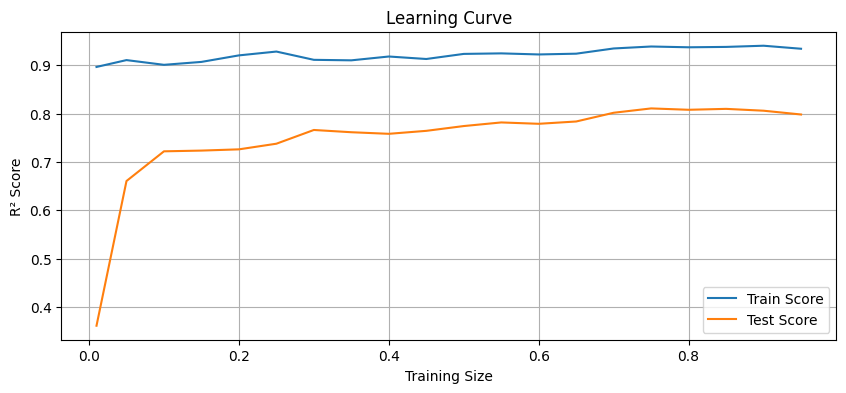

In [20]:
import matplotlib.pyplot as plt

# Treinar o modelo com diferentes tamanhos de conjunto de treinamento
train_scores = []
test_scores = []
#training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
training_sizes= [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for size in training_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    pipe.fit(X_train_subset, y_train_subset)

    train_score_subset = pipe.score(X_train_subset, y_train_subset)
    test_score_subset = pipe.score(X_test, y_test)

    train_scores.append(train_score_subset)
    test_scores.append(test_score_subset)

# Plotar a linha de aprendizado
plt.figure(figsize=(10, 4))
plt.plot(training_sizes, train_scores, label="Train Score")
plt.plot(training_sizes, test_scores, label="Test Score")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()







## TESTANDO COM XGBREGRESSOR E AJUSTE DE HIPERPARÂMETROS

In [25]:
# carregando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.cat_boost import CatBoostEncoder
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor

# carregando o dataset
games = pd.read_csv('vendas_games.csv')

# como as linhas com dados faltantes representam uma pequena parcela do dataset, optei por deletar essas linhas
games = games.dropna()

# separando a variável dependente das variáveis independentes

X = games.drop(['Global_Sales','Name','Rank'], axis=1)
y = games['Global_Sales']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# separando as variáveis categóricas e numéricas
numerical_features = ['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']
categorical_features = ['Genre','Publisher','Platform']

# cria tratamentos específicos para as variáveis categóricas e numéricas
numeric_transform = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transform = Pipeline(steps=[('catboost',CatBoostEncoder())])

# combina os pré_processamentos dos diferentes tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transform,numerical_features),
        ('cat',categorical_transform,categorical_features)
        ])

# carregando o modelo e ajustando os hiperparâmetros
xgb = XGBRegressor(n_estimators=200,
    learning_rate=0.01,
    max_depth=2,
    min_child_weight=1,
    subsample=0.8,                # Fração de observações amostradas para cada árvore
    colsample_bytree=0.8,         # Fração de features amostradas para cada árvore
    gamma=0.0,                    # Valor de corte para dividir as árvores
    reg_alpha=0.5,                # Termo de regularização L1 (Lasso)
    reg_lambda=0.5,               # Termo de regularização L2 (Ridge)
    random_state=42 )

# roda o pré-processamento, seleção de features e o modelo
pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),
    ('XGBRegressor',xgb)
])

# treinando o modelo
pipe.fit(X_train,y_train)

# avaliar modelo no conjunto de treino
train_score = pipe.score(X_train, y_train)

# avaliar modelo no conjunto de teste
test_score = pipe.score(X_test, y_test)

# 7. Fazer previsões no conjunto de teste
y_pred = pipe.predict(X_test)

# Print the train and test scores
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')

# 8. Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print('média Absoluta dos erros quadráticos:', rmse)

Train score: 0.9146620209044747
Test score: 0.7510979070973751


Erro Quadrático Médio (MSE): 0.8331471118503969
Erro Absoluto Médio (MAE): 0.20700679054529497
Coeficiente de Determinação (R²): 0.7510979070973751
média Absoluta dos erros quadráticos: 0.9127689257694944


## TESTANDO VÁRIOS MODELOS COM AJUSTES DE HIPERPARÂMETROS.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Carregando o dataset
games = pd.read_csv('vendas_games.csv')
games = games.dropna()

# Separando a variável dependente das variáveis independentes
X = games.drop('Global_Sales', axis=1)
y = games['Global_Sales']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Separando as variáveis categóricas e numéricas
numerical_features = ['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Genre','Publisher','Platform']

# Cria tratamentos específicos para as variáveis categóricas e numéricas
numeric_transform = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transform = Pipeline(steps=[('catboost',CatBoostEncoder())])

# Combina os pré-processamentos dos diferentes tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numerical_features),
        ('cat',categorical_transform,categorical_features)
    ])

# Lista de algoritmos a serem testados
models = [
    XGBRegressor(n_estimators=200,
                  learning_rate=0.01,
                  max_depth=3,
                  min_child_weight=1,
                  subsample=0.8,                # Fração de observações amostradas para cada árvore
                  colsample_bytree=0.8,         # Fração de features amostradas para cada árvore
                  gamma=0.0,                    # Valor de corte para dividir as árvores
                  reg_alpha=0.2,                # Termo de regularização L1 (Lasso)
                  reg_lambda=1,               # Termo de regularização L2 (Ridge)
                  objective='reg:squarederror', # Função objetivo para regressão
                  eval_metric='rmse',           # Métrica de avaliação
                  random_state=42 ),
    RandomForestRegressor(n_estimators=100,      # Número de árvores na floresta
                           max_depth=2,         # Profundidade máxima das árvores
                           min_samples_split=4,    # Número mínimo de amostras necessárias para dividir um nó interno
                           min_samples_leaf= 4,     # Número mínimo de amostras em um nó folha
                           random_state=42),
    AdaBoostRegressor(n_estimators=100,         # Número de estimadores
                      learning_rate=0.01,       # Taxa de aprendizado
                      loss='linear',           # Função de perda
                      random_state=42),
    GradientBoostingRegressor(n_estimators=100,       # Número de estimadores
                              learning_rate=0.01,       # Taxa de aprendizado
                              max_depth=5,             # Profundidade máxima das árvores
                              min_samples_split=2,     # Número mínimo de amostras para dividir um nó interno
                              min_samples_leaf=2,      # Número mínimo de amostras em um nó folha
                              subsample=1.0,           # Fração de amostras usadas para ajustar os estimadores
                              random_state=42 ),
    DecisionTreeRegressor(
                          splitter='best',         # Estratégia para escolher a divisão em um nó ('best' ou 'random')
                          max_depth=3,          # Profundidade máxima da árvore
                          min_samples_split=2,     # Número mínimo de amostras para dividir um nó interno
                          min_samples_leaf=5,      # Número mínimo de amostras em um nó folha
                          min_weight_fraction_leaf=0.0,  # Fração mínima do peso total das amostras (se aplicável)
                          max_features=None,       # Número máximo de features a serem consideradas para a divisão
                          random_state=None,       # Seed para reprodutibilidade
                          max_leaf_nodes=4,     # Número máximo de nós folha
                           )

]

# Loop para treinar e avaliar os modelos
for model in models:
    model_name = model.__class__.__name__

    # Cria o pipeline do modelo
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Treina o modelo
    pipe.fit(X_train, y_train)

    # Avalia o modelo no conjunto de treinamento e teste
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    # Imprime os resultados
    print(f'{model_name}:')
    print(f'Train score: {train_score:.4f}')
    print(f'Test score: {test_score:.4f}')
    print('*' * 50)


XGBRegressor:
Train score: 0.9368
Test score: 0.7897
**************************************************
RandomForestRegressor:
Train score: 0.8518
Test score: 0.7244
**************************************************
AdaBoostRegressor:
Train score: 0.9260
Test score: 0.7989
**************************************************
GradientBoostingRegressor:
Train score: 0.8492
Test score: 0.7140
**************************************************
DecisionTreeRegressor:
Train score: 0.7831
Test score: 0.6715
**************************************************


# TESTANDO O MODELO COM CROSS VALIDATION E AJUSTE DE HIPERPARÂMETROS

In [ ]:
# instalando a biblioteca
!pip install feature_engine

In [10]:
# Importando as bibliotecas
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.cat_boost import CatBoostEncoder
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor

# Carregando o dataset
games = pd.read_csv('vendas_games.csv')

# como os dados faltantes representam menos de 2% de cada coluna optei por deletar esses dados
games = games.dropna()

# Separando a variável dependente das variáveis independentes
X = games.drop('Global_Sales', axis=1)
y = games['Global_Sales']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Separando as variáveis  numéricas
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Cria tratamentos específicos para as variáveis  numéricas
numeric_transform = Pipeline(steps=[('scaler', StandardScaler())])

# Combina os pré-processamentos das features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numerical_features)
    ])

xb = XGBRegressor(n_estimators=200,
    learning_rate=0.01,           # taxa de aprendizado
    max_depth=2,                  # profundidade da árvore
    min_child_weight=1,
    subsample=0.8,                # Fração de observações amostradas para cada árvore
    colsample_bytree=0.8,         # Fração de features amostradas para cada árvore
    gamma=0.0,                    # Valor de corte para dividir as árvores
    reg_alpha=0.2,                # Termo de regularização L1 (Lasso)
    reg_lambda=1,               # Termo de regularização L2 (Ridge)
    random_state=42)

# Roda o pré-processamento, seleção de features e o modelo
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),
    ('XGBRegressor', xb)
])

# Realiza a validação cruzada
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Treina o modelo no conjunto de treino
pipe.fit(X_train, y_train)

# Avalia o modelo no conjunto de treino e teste
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)

# Faz previsões no conjunto de teste
y_pred = pipe.predict(X_test)

# Print dos scores da validação cruzada
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())
print('\n')

# Print dos scores do conjunto de treino e teste
print('Train score:', train_score)
print('Test score:', test_score)
print('\n')

# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Quadrático Médio Logarítmico (MSLE):", msle)
print('Média Absoluta dos Erros Quadráticos (RMSE):', rmse)


Cross-Validation Scores: [-0.16879305 -0.13065613 -0.20113113 -0.36237749 -0.303435  ]
Mean CV Score: -0.2332785612932943


Train score: 0.9090845712800802
Test score: 0.742218648912151


Erro Quadrático Médio (MSE): 0.862868550614223
Erro Absoluto Médio (MAE): 0.210853224336223
Coeficiente de Determinação (R²): 0.742218648912151
Erro Quadrático Médio Logarítmico (MSLE): 0.021094345354541518
Média Absoluta dos Erros Quadráticos (RMSE): 0.9289071808389808


## USANDO O GRIDSEARCH PARA AJUSTAR OS MELHORES HIPEPARÂMETROS NO MODELO RANDOM FOREST.

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import CatBoostEncoder
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Carregando o dataset
games = pd.read_csv('vendas_games.csv')

# Removendo linhas com dados faltantes
games = games.dropna()

# Separando a variável dependente das variáveis independentes
X = games.drop(['Global_Sales', 'Name', 'Rank'], axis=1)
y = games['Global_Sales']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Separando as variáveis categóricas e numéricas
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
categorical_features = ['Genre', 'Publisher', 'Platform']

# Criando tratamentos específicos para as variáveis categóricas e numéricas
numeric_transform = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transform = Pipeline(steps=[('catboost', CatBoostEncoder())])

# Combinando os pré-processamentos dos diferentes tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numerical_features),
        ('cat', categorical_transform, categorical_features)
    ])

# Carregando o modelo e ajustando os hiperparâmetros
rf = RandomForestRegressor(random_state=42)

# Criando o pipeline com as etapas
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),
    ('RandomForestRegressor', rf)
])

# Definindo os possíveis valores de hiperparâmetros para o Grid Search
param_grid = {
    'RandomForestRegressor__n_estimators': [100,150, 200],
    'RandomForestRegressor__max_depth': [2,3,4],
    'RandomForestRegressor__min_samples_split': [3,4,5],
    'RandomForestRegressor__min_samples_leaf': [3,4,5]
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=2, scoring='neg_mean_squared_error')

# Ajustando o Grid Search aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros e o modelo otimizado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fazendo previsões com o modelo otimizado
y_pred = best_model.predict(X_test)

# Avaliando o modelo otimizado
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimindo os resultados
print("Melhores parâmetros:", best_params)
print('Train score:', train_score)
print('Test score:', test_score)
print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)
print('Raiz Quadrada do Erro Quadrático Médio (RMSE):', rmse)


Melhores parâmetros: {'RandomForestRegressor__max_depth': 4, 'RandomForestRegressor__min_samples_leaf': 3, 'RandomForestRegressor__min_samples_split': 3, 'RandomForestRegressor__n_estimators': 150}
Train score: 0.9619114263257083
Test score: 0.8034892898597825
Erro Quadrático Médio (MSE): 0.657778039114536
Erro Absoluto Médio (MAE): 0.15532005535964608
Coeficiente de Determinação (R²): 0.8034892898597825
Raiz Quadrada do Erro Quadrático Médio (RMSE): 0.8110351651528657
